# Final Project

### Team Member 1: Anirudh Khandelwal (UIN: 233005171)
### Team Member 2: Mayur Kulkarni (UIN: 532008193)¶

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler, QuantileTransformer
warnings.filterwarnings('ignore')

# Load the dataset
file_path = "VolveData_Project.xlsx"
df_well14 = pd.read_excel(file_path, sheet_name="well 14")
df_well15 = pd.read_excel(file_path, sheet_name="well 15")

In [2]:
df_well14

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN
...,...,...,...,...,...,...,...
2077,4218.5,14,104.2228,1.2340,2.5691,0.2684,SH
2078,4219.0,14,102.1531,1.3889,2.5750,0.3058,SH
2079,4219.5,14,105.3466,1.2691,2.6109,0.2785,SH
2080,4220.0,14,98.3625,1.1490,2.5791,0.3094,SH


In [3]:
df_well15

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3500.0,15,36.374,1.756,2.4680,0.1694,SS
1,3500.5,15,27.346,1.697,2.4460,0.1662,SS
2,3501.0,15,16.766,1.924,2.4481,0.1660,SS
3,3501.5,15,19.357,1.987,2.5120,0.1679,SS
4,3502.0,15,17.445,2.017,2.4940,0.1536,SS
...,...,...,...,...,...,...,...
1154,4083.5,15,59.706,1.759,2.4851,0.1416,CB
1155,4084.0,15,58.417,1.651,2.4860,0.1416,CB
1156,4084.5,15,57.499,1.597,2.5311,0.1527,CB
1157,4085.0,15,56.785,1.482,2.4731,0.1785,CB


## Merge Well 14 and Well 15 data for training

In [4]:
trainData = pd.concat((df_well14, df_well15), axis = 0)
trainData.reset_index(drop=True, inplace=True)
trainData

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN
...,...,...,...,...,...,...,...
3236,4083.5,15,59.7060,1.7590,2.4851,0.1416,CB
3237,4084.0,15,58.4170,1.6510,2.4860,0.1416,CB
3238,4084.5,15,57.4990,1.5970,2.5311,0.1527,CB
3239,4085.0,15,56.7850,1.4820,2.4731,0.1785,CB


In [5]:
trainData.shape

(3241, 7)

In [6]:
print('Number of samples in Train Dataset (Well 14 & Well 15): %d' %(trainData.shape[0]))

Number of samples in Train Dataset (Well 14 & Well 15): 3241


In [7]:
trainData.groupby('Facies').count()

,Depth,Well,GR,RT,RHOB,NPHI
Facies,,,,,,
CB,1249,1249,1249,1249,1249,1249
SH,871,871,871,871,871,871
SS,997,997,997,997,997,997
UN,124,124,124,124,124,124


<h3> Visualize Data using Seaborn Pairplot </h3>

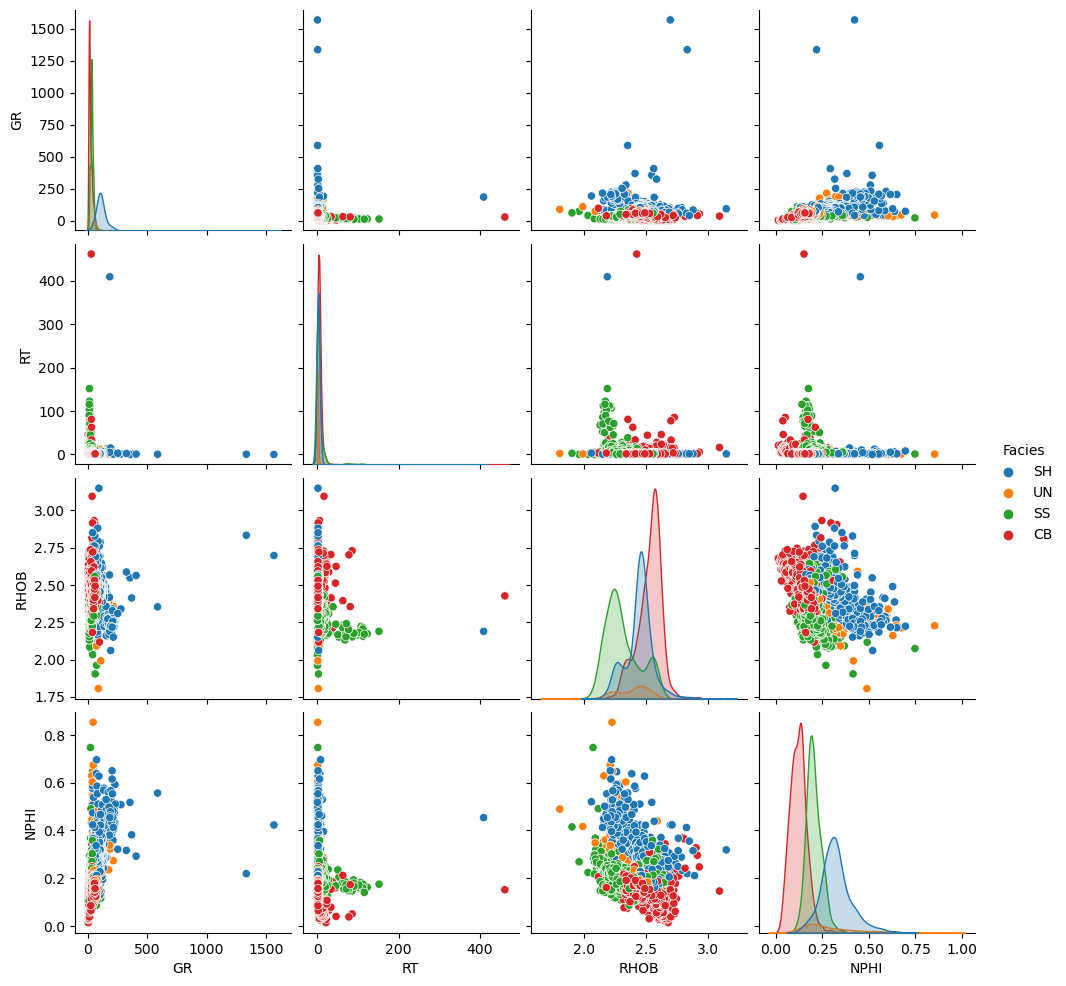

In [8]:
sns.pairplot(trainData.iloc[:,2:], hue = 'Facies')

<h3> Split dataset into feature and Target</h3>

In [9]:
trainFeature = trainData.iloc[:,2:-1]
X=trainFeature
X

,GR,RT,RHOB,NPHI
0,50.2190,0.5888,2.3296,0.3657
1,47.2468,0.7768,2.3170,0.3776
2,49.5247,1.0707,2.2960,0.5390
3,44.9124,1.4460,2.2514,0.5482
4,47.0048,0.9542,2.2733,0.5076
...,...,...,...,...
3236,59.7060,1.7590,2.4851,0.1416
3237,58.4170,1.6510,2.4860,0.1416
3238,57.4990,1.5970,2.5311,0.1527
3239,56.7850,1.4820,2.4731,0.1785


In [10]:
trainTarget  = trainData.iloc[:,-1]
y=trainTarget
y

0       SH
1       UN
2       SH
3       UN
4       UN
        ..
3236    CB
3237    CB
3238    CB
3239    CB
3240    CB
Name: Facies, Length: 3241, dtype: object

### Train Test Split for the Data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify=y)

In [12]:
X_train

,GR,RT,RHOB,NPHI
2763,35.1440,13.7740,2.1990,0.2279
2641,85.0190,1.6160,2.6235,0.2354
2018,97.7707,2.6200,2.4980,0.2486
201,58.5950,0.6250,2.2869,0.3014
3232,59.5350,1.5240,2.4161,0.1906
...,...,...,...,...
198,30.6030,0.4640,2.2598,0.2006
2449,223.0600,2.2590,2.2751,0.4695
824,29.7870,2.3099,2.4730,0.1400
2919,9.8590,2.1690,2.4629,0.1394


In [13]:
X_test

,GR,RT,RHOB,NPHI
2043,93.5634,1.7191,2.4897,0.6278
2182,13.8390,5.4100,2.5780,0.0924
822,14.8150,1.9295,2.4910,0.1231
1189,223.4467,3.0687,2.2190,0.4252
49,51.3620,1.1402,2.3348,0.3600
...,...,...,...,...
158,53.8453,0.4328,2.2480,0.3412
419,12.0003,1.3257,2.3909,0.2285
1486,97.2644,1.6147,2.4480,0.2729
1137,43.5580,1.9463,2.5789,0.1760


In [14]:
y_train

2763    SS
2641    SH
2018    SH
201     UN
3232    CB
        ..
198     SS
2449    SH
824     CB
2919    CB
1775    SS
Name: Facies, Length: 2592, dtype: object

In [15]:
y_test

2043    SH
2182    CB
822     CB
1189    SH
49      SH
        ..
158     SH
419     SS
1486    SH
1137    SS
2875    SS
Name: Facies, Length: 649, dtype: object

<h3>Visualize Distibution of each Feature using Histogram </h3>

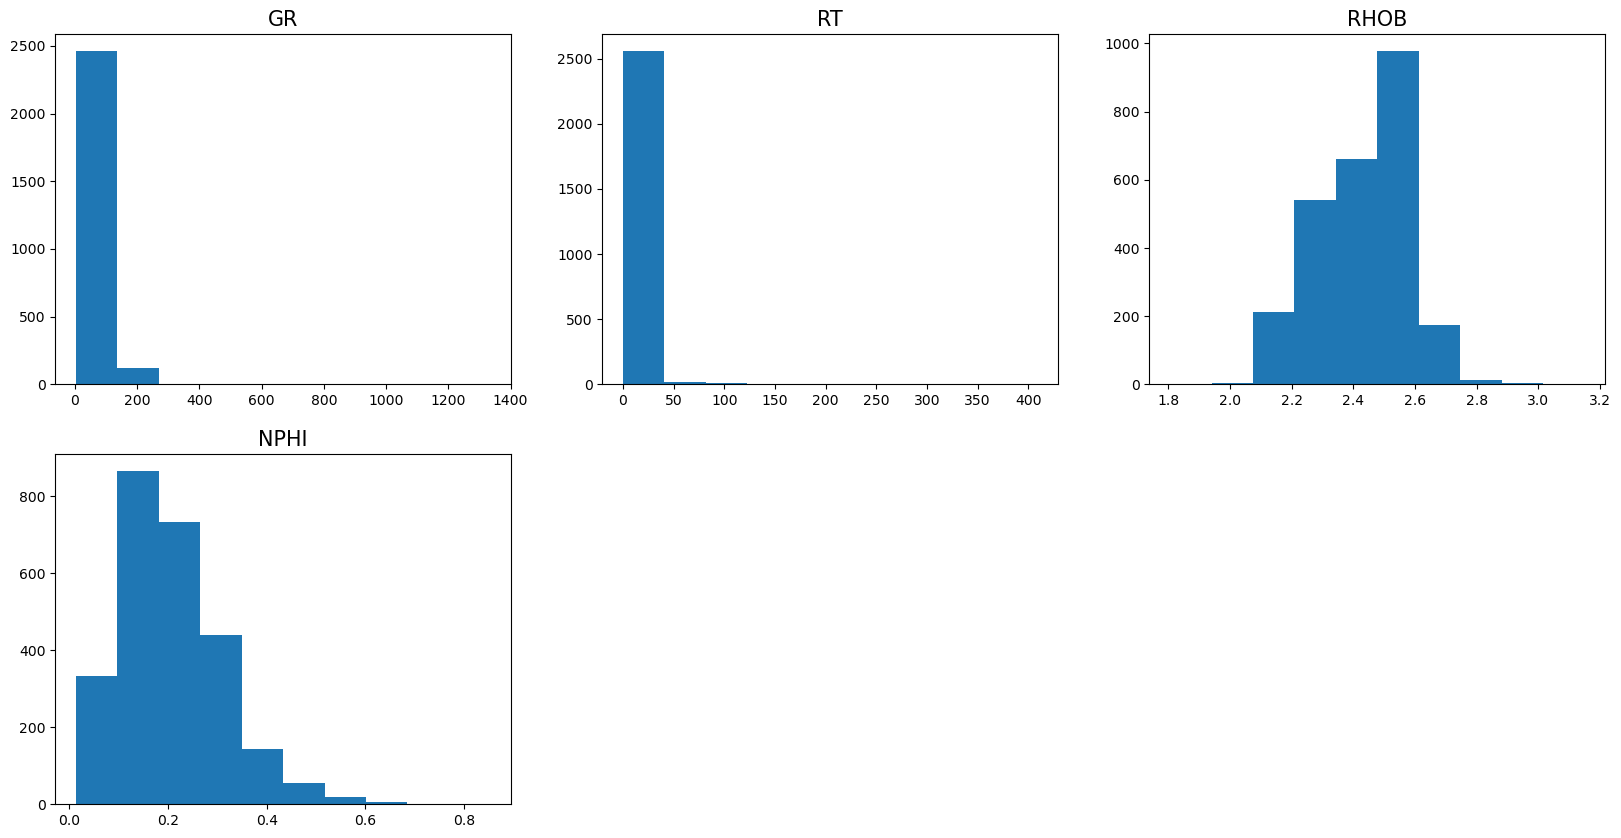

In [16]:
columnName = X_train

index = 1
plt.figure(figsize=(20,10))

for name in columnName:
    plt.subplot(2,3,index)
    
    plt.hist(X_train.loc[:,name])
    
    plt.title(name, fontsize = 15)
    
    index += 1

### Note:<b> Since GR and RT are not in Gaussian/normal distribution. We have used Logarithmic transforamtion for thosre features.<b/>

## Log Transform Few Features

#### Train Data

In [17]:
X_train['RT_log'] = np.log10(X_train.RT) # New feature
X_train['GR_log'] = np.log10(X_train.GR) # New feature
X_train.drop(['RT','GR'], inplace = True,axis = 1) # drop the original resistivity
X_train

,RHOB,NPHI,RT_log,GR_log
2763,2.1990,0.2279,1.139060,1.545851
2641,2.6235,0.2354,0.208441,1.929516
2018,2.4980,0.2486,0.418301,1.990209
201,2.2869,0.3014,-0.204120,1.767861
3232,2.4161,0.1906,0.182985,1.774772
...,...,...,...,...
198,2.2598,0.2006,-0.333482,1.485764
2449,2.2751,0.4695,0.353916,2.348422
824,2.4730,0.1400,0.363593,1.474027
2919,2.4629,0.1394,0.336260,0.993833


#### Test Data

In [18]:
X_test['RT_log'] = np.log10(X_test.RT) # New feature
X_test['GR_log'] = np.log10(X_test.GR) # New feature
X_test.drop(['RT','GR'], inplace = True,axis = 1) # drop the original resistivity
X_test

,RHOB,NPHI,RT_log,GR_log
2043,2.4897,0.6278,0.235301,1.971106
2182,2.5780,0.0924,0.733197,1.141105
822,2.4910,0.1231,0.285445,1.170702
1189,2.2190,0.4252,0.486954,2.349174
49,2.3348,0.3600,0.056981,1.710642
...,...,...,...,...
158,2.2480,0.3412,-0.363713,1.731148
419,2.3909,0.2285,0.122445,1.079192
1486,2.4480,0.2729,0.208092,1.987954
1137,2.5789,0.1760,0.289210,1.639068


<h3>Visualize Distibution after log transformation</h3>

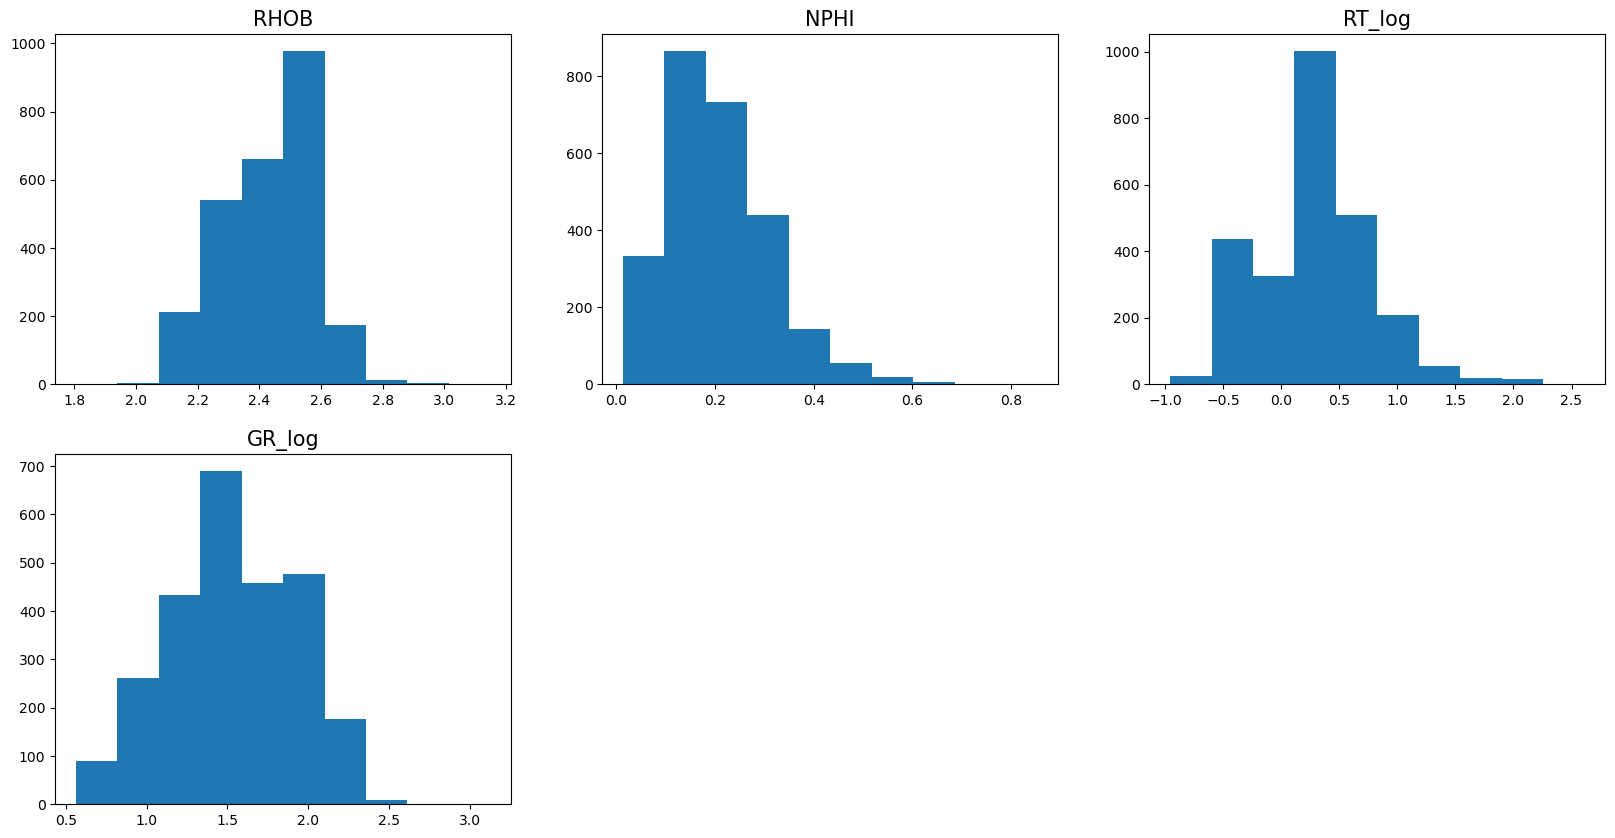

In [19]:
columnName = X_train

index = 1
plt.figure(figsize=(20,10))

for name in columnName:
    plt.subplot(2,3,index)
    
    plt.hist(X_train.loc[:,name])
    
    plt.title(name, fontsize = 15)
    
    index += 1

## Fixing missing and corrupt values

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2592 entries, 2763 to 1775
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHOB    2592 non-null   float64
 1   NPHI    2592 non-null   float64
 2   RT_log  2592 non-null   float64
 3   GR_log  2592 non-null   float64
dtypes: float64(4)
memory usage: 101.2 KB


In [21]:
X_train.isna().any()

RHOB      False
NPHI      False
RT_log    False
GR_log    False
dtype: bool

In [22]:
X_train.describe()

,RHOB,NPHI,RT_log,GR_log
count,2592.000000,2592.000000,2592.000000,2592.000000
mean,2.433556,0.206425,0.278413,1.539068
std,0.148900,0.103249,0.487295,0.391954
min,1.805100,0.013500,-0.958607,0.562887
25%,2.311000,0.132100,-0.007922,1.240299
50%,2.460950,0.188100,0.274181,1.530820
75%,2.551000,0.267425,0.568472,1.859011
max,3.149300,0.853200,2.611698,3.125488


In [23]:
X_train.replace([np.inf, -np.inf, 'Inf', -999, 999, '', " ", 'inf', 'NaN'], np.nan, inplace=True)

In [24]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 2043 to 2875
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHOB    649 non-null    float64
 1   NPHI    649 non-null    float64
 2   RT_log  649 non-null    float64
 3   GR_log  649 non-null    float64
dtypes: float64(4)
memory usage: 25.4 KB


In [25]:
X_test.isna().any()

RHOB      False
NPHI      False
RT_log    False
GR_log    False
dtype: bool

In [26]:
X_test.describe()

,RHOB,NPHI,RT_log,GR_log
count,649.000000,649.000000,649.000000,649.000000
mean,2.429221,0.211577,0.278199,1.546032
std,0.142671,0.108099,0.486776,0.384148
min,1.903600,0.038800,-1.026872,0.664933
25%,2.312900,0.138100,0.035430,1.251151
50%,2.454000,0.187400,0.258829,1.537335
75%,2.544600,0.267600,0.563849,1.844142
max,3.094900,0.674100,2.663861,3.195232


In [27]:
X_test.replace([np.inf, -np.inf, 'Inf', -999, 999, '', " ", 'inf', 'NaN'], np.nan, inplace=True)

### Creating 3 new features train data

In [28]:
X_train['feature1'] = X_train.eval('RT_log - GR_log') ## New feature
X_train['feature2'] = X_train.eval('100*RHOB/NPHI')
X_train['feature3'] = X_train.eval('RT_log/(RHOB - NPHI)/RHOB')

X_train

,RHOB,NPHI,RT_log,GR_log,feature1,feature2,feature3
2763,2.1990,0.2279,1.139060,1.545851,-0.406791,964.896885,0.262792
2641,2.6235,0.2354,0.208441,1.929516,-1.721075,1114.485981,0.033270
2018,2.4980,0.2486,0.418301,1.990209,-1.571907,1004.827031,0.074444
201,2.2869,0.3014,-0.204120,1.767861,-1.971981,758.759124,-0.044954
3232,2.4161,0.1906,0.182985,1.774772,-1.591787,1267.628541,0.034031
...,...,...,...,...,...,...,...
198,2.2598,0.2006,-0.333482,1.485764,-1.819246,1126.520439,-0.071664
2449,2.2751,0.4695,0.353916,2.348422,-1.994505,484.579340,0.086155
824,2.4730,0.1400,0.363593,1.474027,-1.110434,1766.428571,0.063020
2919,2.4629,0.1394,0.336260,0.993833,-0.657573,1766.786227,0.058760


### Creating 3 new features test data

In [29]:
X_test['feature1'] = X_test.eval('RT_log - GR_log') ## New feature
X_test['feature2'] = X_test.eval('100*RHOB/NPHI')
X_test['feature3'] = X_test.eval('RT_log/(RHOB - NPHI)/RHOB')

X_test

,RHOB,NPHI,RT_log,GR_log,feature1,feature2,feature3
2043,2.4897,0.6278,0.235301,1.971106,-1.735805,396.575342,0.050760
2182,2.5780,0.0924,0.733197,1.141105,-0.407907,2790.043290,0.114421
822,2.4910,0.1231,0.285445,1.170702,-0.885257,2023.558083,0.048393
1189,2.2190,0.4252,0.486954,2.349174,-1.862220,521.872060,0.122337
49,2.3348,0.3600,0.056981,1.710642,-1.653661,648.555556,0.012358
...,...,...,...,...,...,...,...
158,2.2480,0.3412,-0.363713,1.731148,-2.094861,658.851114,-0.084851
419,2.3909,0.2285,0.122445,1.079192,-0.956747,1046.345733,0.023683
1486,2.4480,0.2729,0.208092,1.987954,-1.779862,897.031880,0.039081
1137,2.5789,0.1760,0.289210,1.639068,-1.349858,1465.284091,0.046671


<h3>Label Encoding for target </h3>

### Train data Target

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_train_le = label_encoder.fit_transform(y_train)
y_train_le

array([2, 1, 1, ..., 0, 0, 2])

### Test data Target

In [31]:
y_test_le = label_encoder.fit_transform(y_test)
y_test_le

array([1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0,
       2, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 3, 2, 0, 3, 1, 0,
       2, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 3, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 3, 0, 0, 1, 0,
       2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 3, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0,
       0, 2, 0, 1, 1, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 2, 2, 3, 1, 1, 0, 0,
       1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 1,
       3, 1, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0,
       1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0,
       1, 0, 0, 0, 3, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1,

### Saving the Label Enocder

In [32]:
filename = 'Facies_label_encoder.sav'

pickle.dump(label_encoder, open(filename, 'wb'))

# Fixing missing and corrupt data
## Simple Imputer

### For Train data

In [33]:
from sklearn.impute import SimpleImputer

numeric_cols_train = X_train.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='median')
X_train[numeric_cols_train] = imputer.fit_transform(X_train[numeric_cols_train])

In [34]:
X_train.isna().any()

RHOB        False
NPHI        False
RT_log      False
GR_log      False
feature1    False
feature2    False
feature3    False
dtype: bool

### For Test data

In [35]:
numeric_cols_test = X_test.select_dtypes(include=['number']).columns

X_test[numeric_cols_test] = imputer.fit_transform(X_test[numeric_cols_test])

In [36]:
X_test.isna().any()

RHOB        False
NPHI        False
RT_log      False
GR_log      False
feature1    False
feature2    False
feature3    False
dtype: bool

#### Saving the numeric imputer

In [37]:
import pickle

filename = 'Facies_Imputer.sav'
pickle.dump(imputer, open(filename, 'wb'))

# Outlier Detection

### For Train data

In [38]:
from sklearn.ensemble import IsolationForest
out = IsolationForest(contamination = 0.03, max_samples = 0.8, max_features=1.0)
out.fit(X_train)
in_out=out.predict(X_train)
in_out

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
X_train_i = X_train[in_out==1] ## inlier training feature set
y_train_le_i = y_train_le[in_out==1] ## inlier training target set

In [40]:
X_train_i

,RHOB,NPHI,RT_log,GR_log,feature1,feature2,feature3
2763,2.1990,0.2279,1.139060,1.545851,-0.406791,964.896885,0.262792
2641,2.6235,0.2354,0.208441,1.929516,-1.721075,1114.485981,0.033270
2018,2.4980,0.2486,0.418301,1.990209,-1.571907,1004.827031,0.074444
201,2.2869,0.3014,-0.204120,1.767861,-1.971981,758.759124,-0.044954
3232,2.4161,0.1906,0.182985,1.774772,-1.591787,1267.628541,0.034031
...,...,...,...,...,...,...,...
198,2.2598,0.2006,-0.333482,1.485764,-1.819246,1126.520439,-0.071664
2449,2.2751,0.4695,0.353916,2.348422,-1.994505,484.579340,0.086155
824,2.4730,0.1400,0.363593,1.474027,-1.110434,1766.428571,0.063020
2919,2.4629,0.1394,0.336260,0.993833,-0.657573,1766.786227,0.058760


In [41]:
y_train_le_i

array([2, 1, 1, ..., 0, 0, 2])

In [42]:
print('Shape of train data before outlier removal:', X_train.shape)
print('Shape of train data after outlier removal:',X_train_i.shape)

Shape of train data before outlier removal: (2592, 7)
Shape of train data after outlier removal: (2514, 7)


### For Test data

In [43]:
test_in_out=out.predict(X_test)
test_in_out

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [44]:
X_test_i =X_test[test_in_out==1] ## inlier training target set
y_test_le_i =y_test_le[test_in_out==1] ## inlier testing target set

In [45]:
X_test_i

,RHOB,NPHI,RT_log,GR_log,feature1,feature2,feature3
2043,2.4897,0.6278,0.235301,1.971106,-1.735805,396.575342,0.050760
2182,2.5780,0.0924,0.733197,1.141105,-0.407907,2790.043290,0.114421
822,2.4910,0.1231,0.285445,1.170702,-0.885257,2023.558083,0.048393
1189,2.2190,0.4252,0.486954,2.349174,-1.862220,521.872060,0.122337
49,2.3348,0.3600,0.056981,1.710642,-1.653661,648.555556,0.012358
...,...,...,...,...,...,...,...
158,2.2480,0.3412,-0.363713,1.731148,-2.094861,658.851114,-0.084851
419,2.3909,0.2285,0.122445,1.079192,-0.956747,1046.345733,0.023683
1486,2.4480,0.2729,0.208092,1.987954,-1.779862,897.031880,0.039081
1137,2.5789,0.1760,0.289210,1.639068,-1.349858,1465.284091,0.046671


In [46]:
y_test_le_i

array([1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2,
       0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 0, 3, 0, 0, 0, 0, 2, 2, 0, 2, 2, 3, 2, 0, 3, 1, 0, 2, 1,
       2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 3, 0, 0, 1, 0, 2, 2, 2, 1,
       1, 2, 0, 1, 0, 1, 2, 3, 2, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1,
       1, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2,
       1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 3, 1, 0, 0, 1, 2, 2,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1,
       1, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 1, 1, 0,
       1, 2, 1, 1, 2, 2, 3, 0, 1, 2, 2, 1, 2, 2, 0,

### Saving Outlier

In [47]:
filename = 'Facies_Outlier.sav'

pickle.dump(out, open(filename, 'wb'))

## Standard Scaling

### For Train Data

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_i_s = scaler.fit_transform(X_train_i)
X_train_i_s

array([[-1.64122505,  0.22688439,  1.9973988 , ...,  1.39573026,
        -0.59721966,  2.57224268],
       [ 1.30033236,  0.30308383, -0.09330517, ..., -0.67204214,
        -0.44858189, -0.0804354 ],
       [ 0.43068465,  0.43719484,  0.37816073, ..., -0.43735623,
        -0.55754346,  0.39543089],
       ...,
       [ 0.25744805, -0.66617305,  0.2552549 , ...,  0.28868413,
         0.19921462,  0.26339613],
       [ 0.18746047, -0.672269  ,  0.19384788, ...,  1.00117268,
         0.19957   ,  0.21416957],
       [-1.12844473, -0.09416925, -1.63415563, ..., -0.90954315,
        -0.40542256, -1.63388502]])

In [49]:
X_train_i_s_df=pd.DataFrame(X_train_i_s,columns=X_train_i.columns)
X_train_i_s_df

,RHOB,NPHI,RT_log,GR_log,feature1,feature2,feature3
0,-1.641225,0.226884,1.997399,0.005095,1.395730,-0.597220,2.572243
1,1.300332,0.303084,-0.093305,1.004794,-0.672042,-0.448582,-0.080435
2,0.430685,0.437195,0.378161,1.162939,-0.437356,-0.557543,0.395431
3,-1.032125,0.973639,-1.020155,0.583576,-1.066794,-0.802046,-0.984497
4,-0.136838,-0.152081,-0.150495,0.601585,-0.468634,-0.296413,-0.071640
...,...,...,...,...,...,...,...
2509,-1.219914,-0.050482,-1.310776,-0.151472,-0.826496,-0.436624,-1.293200
2510,-1.113893,2.681522,0.233515,2.096319,-1.102233,-1.074483,0.530774
2511,0.257448,-0.666173,0.255255,-0.182055,0.288684,0.199215,0.263396
2512,0.187460,-0.672269,0.193848,-1.433276,1.001173,0.199570,0.214170


### For Test data

In [50]:
X_test_i_s = scaler.transform(X_test_i)
X_test_i_s

array([[ 0.3731701 ,  4.28983851, -0.03296267, ..., -0.69521731,
        -1.16192692,  0.12170399],
       [ 0.98504176, -1.14978549,  1.08559789, ...,  1.39397392,
         1.21631957,  0.85746216],
       [ 0.3821784 , -0.83787578,  0.07968874, ...,  0.64295639,
         0.45470889,  0.09435217],
       ...,
       [ 0.08421145,  0.68408102, -0.09409037, ..., -0.76453286,
        -0.66465308, -0.01327459],
       [ 0.99127828, -0.30041573,  0.08814709, ..., -0.08800438,
        -0.10001471,  0.0744418 ],
       [-1.02450277, -0.38271113,  2.06538374, ...,  1.68732177,
        -0.20193061,  2.32105105]])

In [51]:
X_test_i_s_df=pd.DataFrame(X_test_i_s,columns=X_test_i.columns)
X_test_i_s_df

,RHOB,NPHI,RT_log,GR_log,feature1,feature2,feature3
0,0.373170,4.289839,-0.032963,1.113164,-0.695217,-1.161927,0.121704
1,0.985042,-1.149785,1.085598,-1.049536,1.393974,1.216320,0.857462
2,0.382178,-0.837876,0.079689,-0.972416,0.642956,0.454709,0.094352
3,-1.502636,2.231438,0.532395,2.098280,-0.894106,-1.037427,0.948945
4,-0.700204,1.569011,-0.433572,0.434483,-0.565980,-0.911549,-0.322118
...,...,...,...,...,...,...,...
620,-1.301681,1.378004,-1.378692,0.487915,-1.260122,-0.901319,-1.445602
621,-0.311461,0.232980,-0.286502,-1.210859,0.530481,-0.516289,-0.191229
622,0.084211,0.684081,-0.094090,1.157064,-0.764533,-0.664653,-0.013275
623,0.991278,-0.300416,0.088147,0.247986,-0.088004,-0.100015,0.074442


### Saving Scaler

In [52]:
filename = 'Facies_Scaler.sav'

pickle.dump(scaler, open(filename, 'wb'))

## Pearson Correlation Matrix to check Co-linearity

### For Train Data

In [53]:
correlation_matrix_train = pd.DataFrame(X_train_i_s,columns=X_train_i.columns).corr()
correlation_matrix_train

,RHOB,NPHI,RT_log,GR_log,feature1,feature2,feature3
RHOB,1.000000,-0.444422,0.530703,-0.204905,0.495381,0.555195,0.461468
NPHI,-0.444422,1.000000,-0.280326,0.785599,-0.670664,-0.790698,-0.182273
RT_log,0.530703,-0.280326,1.000000,-0.171431,0.803825,0.477728,0.985395
GR_log,-0.204905,0.785599,-0.171431,1.000000,-0.723860,-0.724968,-0.074319
feature1,0.495381,-0.670664,0.803825,-0.723860,1.000000,0.772299,0.734960
feature2,0.555195,-0.790698,0.477728,-0.724968,0.772299,1.000000,0.362243
feature3,0.461468,-0.182273,0.985395,-0.074319,0.734960,0.362243,1.000000


In [54]:
corr_threshold = 0.95

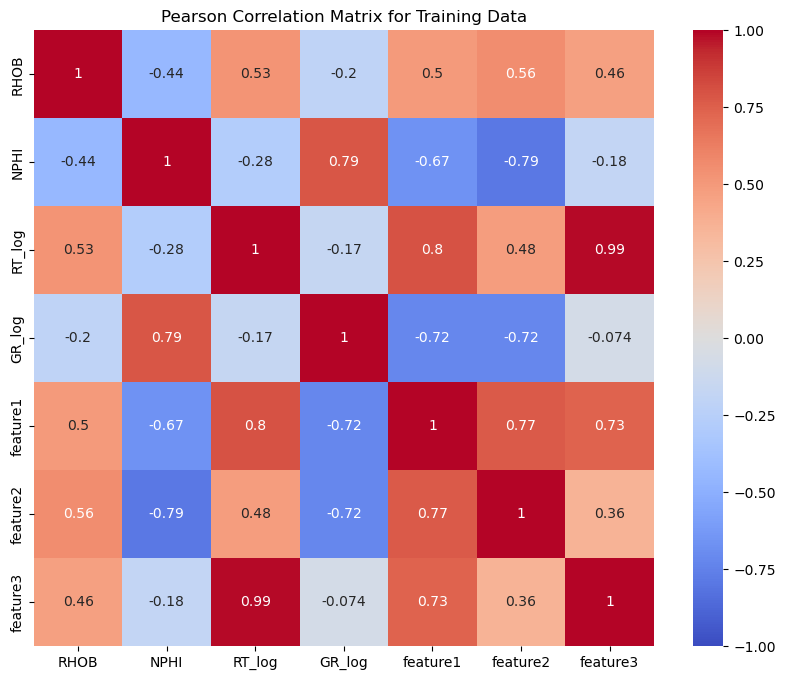

In [55]:
import seaborn as sns
# Display a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix for Training Data')
plt.show()

In [56]:
# Identify highly correlated features
highly_correlated_features_train = []
for i in range(len(correlation_matrix_train.columns)):
    for j in range(i):
        if abs(correlation_matrix_train.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix_train.columns[i]
            highly_correlated_features_train.append(colname)
            
print(f"Highly correlated features train data:", highly_correlated_features_train)

Highly correlated features train data: ['feature3']


### Dropping the highly correlated features from train data which have a corr_threshold > 0.95 

In [57]:
X_train_i_s_no_high_corr = pd.DataFrame(X_train_i_s,columns=X_train_i.columns).drop(columns=highly_correlated_features_train)
X_train_i_s_no_high_corr

,RHOB,NPHI,RT_log,GR_log,feature1,feature2
0,-1.641225,0.226884,1.997399,0.005095,1.395730,-0.597220
1,1.300332,0.303084,-0.093305,1.004794,-0.672042,-0.448582
2,0.430685,0.437195,0.378161,1.162939,-0.437356,-0.557543
3,-1.032125,0.973639,-1.020155,0.583576,-1.066794,-0.802046
4,-0.136838,-0.152081,-0.150495,0.601585,-0.468634,-0.296413
...,...,...,...,...,...,...
2509,-1.219914,-0.050482,-1.310776,-0.151472,-0.826496,-0.436624
2510,-1.113893,2.681522,0.233515,2.096319,-1.102233,-1.074483
2511,0.257448,-0.666173,0.255255,-0.182055,0.288684,0.199215
2512,0.187460,-0.672269,0.193848,-1.433276,1.001173,0.199570


In [58]:
print('Shape of train data before dropping a feature:', X_train_i_s.shape)
print('Shape of train data after outlier removal:',X_train_i_s_no_high_corr.shape)

Shape of train data before dropping a feature: (2514, 7)
Shape of train data after outlier removal: (2514, 6)


### Dropping the highly correlated features from test data which have a corr_threshold > 0.95 

In [59]:
X_test_i_s_no_high_corr = pd.DataFrame(X_test_i_s,columns=X_test_i.columns).drop(columns=highly_correlated_features_train)
X_test_i_s_no_high_corr

,RHOB,NPHI,RT_log,GR_log,feature1,feature2
0,0.373170,4.289839,-0.032963,1.113164,-0.695217,-1.161927
1,0.985042,-1.149785,1.085598,-1.049536,1.393974,1.216320
2,0.382178,-0.837876,0.079689,-0.972416,0.642956,0.454709
3,-1.502636,2.231438,0.532395,2.098280,-0.894106,-1.037427
4,-0.700204,1.569011,-0.433572,0.434483,-0.565980,-0.911549
...,...,...,...,...,...,...
620,-1.301681,1.378004,-1.378692,0.487915,-1.260122,-0.901319
621,-0.311461,0.232980,-0.286502,-1.210859,0.530481,-0.516289
622,0.084211,0.684081,-0.094090,1.157064,-0.764533,-0.664653
623,0.991278,-0.300416,0.088147,0.247986,-0.088004,-0.100015


In [60]:
print('Shape of train data before dropping a feature:', X_test_i_s.shape)
print('Shape of train data after outlier removal:',X_test_i_s_no_high_corr.shape)

Shape of train data before dropping a feature: (625, 7)
Shape of train data after outlier removal: (625, 6)


In [61]:
with open('Facies_highly_correlated_features_train.pkl', 'wb') as f:
    pickle.dump(highly_correlated_features_train, f)

## Association test (F-test and Mutual Information)

In [62]:
from sklearn.feature_selection import f_classif, mutual_info_classif
f_test, p = f_classif(X_train_i_s_no_high_corr, y_train_le_i)
f_test /= np.max(np.abs(f_test))  # Normalize f value
f_test

array([0.29025788, 0.90409532, 0.12231728, 1.        , 0.37429677,
       0.46920027])

In [63]:
mi = mutual_info_classif(X_train_i_s_no_high_corr, y_train_le_i)
mi /= np.max(mi) # normalize mi value
mi

array([0.48647845, 0.94182563, 0.50074389, 1.        , 0.50707807,
       0.86003495])

In [64]:
np.ones(len(mi))

array([1., 1., 1., 1., 1., 1.])

Text(0.5, 0, 'features')

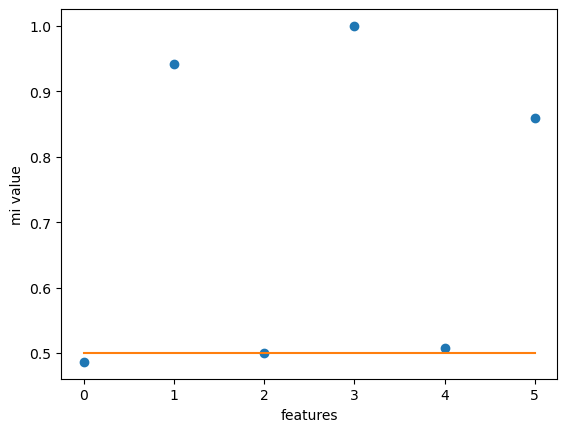

In [65]:
plt.figure()
plt.plot(mi, 'o')
plt.plot(0.5*np.ones(len(mi)))
plt.ylabel('mi value')
plt.xlabel('features')

## find the threshold. This is finding the features.

Text(0.5, 0, 'features')

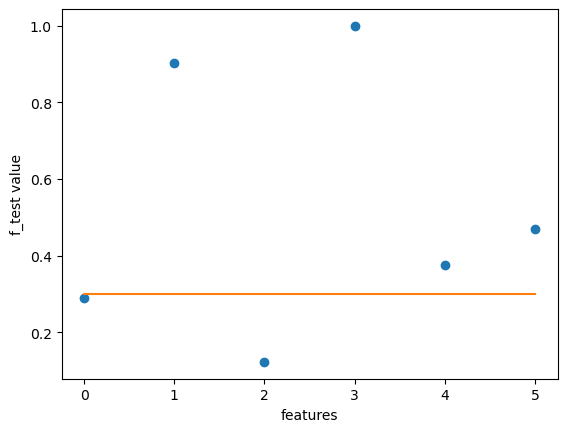

In [66]:
plt.figure()
plt.plot(f_test, 'o')
plt.plot(0.3*np.ones(len(f_test)))
plt.ylabel('f_test value')
plt.xlabel('features')

## find the threshold

Text(0.5, 0, 'features')

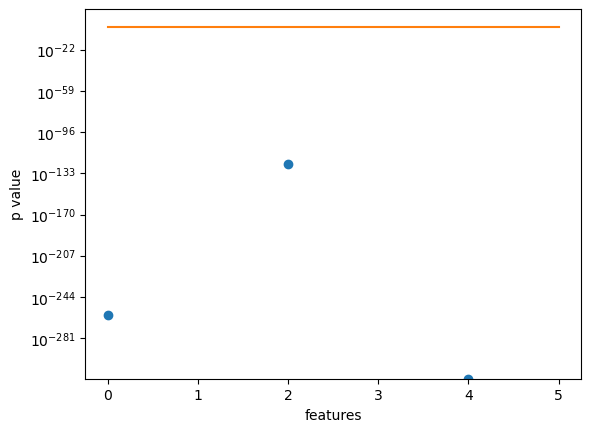

In [67]:
plt.figure()
plt.semilogy(p, 'o')
plt.plot(0.05*np.ones(len(f_test)))
plt.ylabel('p value')
plt.xlabel('features')

## check if F values are useful

In [68]:
f_test>0.3

array([False,  True, False,  True,  True,  True])

In [69]:
mi>0.5

array([False,  True,  True,  True,  True,  True])

In [70]:
p<0.05

array([ True,  True,  True,  True,  True,  True])

In [71]:
(f_test > 0.3) | (mi > 0.5) & (p < 0.05)

array([False,  True,  True,  True,  True,  True])

### Dropping train data feature based on association test

In [72]:
X_train_i_s_no_high_corr_r = X_train_i_s_no_high_corr.loc[:, (f_test > 0.2) & (mi > 0.48) & (p < 0.05)]
print('Train data shape before:', X_train_i_s_no_high_corr.shape)
print('Train data shape after:', X_train_i_s_no_high_corr_r.shape)

Train data shape before: (2514, 6)
Train data shape after: (2514, 5)


### Dropping test data feature based on association test

In [73]:
X_test_i_s_no_high_corr_r = X_test_i_s_no_high_corr.loc[:, (f_test > 0.2) & (mi > 0.48) & (p < 0.05)]
print('Train data shape before:', X_test_i_s_no_high_corr.shape)
print('Train data shape after:', X_test_i_s_no_high_corr_r.shape)

Train data shape before: (625, 6)
Train data shape after: (625, 5)


In [74]:
association_test = (f_test > 0.2) & (mi > 0.48) & (p < 0.05)

In [75]:
X_test_i_s_no_high_corr_r.head()

,RHOB,NPHI,GR_log,feature1,feature2
0,0.373170,4.289839,1.113164,-0.695217,-1.161927
1,0.985042,-1.149785,-1.049536,1.393974,1.216320
2,0.382178,-0.837876,-0.972416,0.642956,0.454709
3,-1.502636,2.231438,2.098280,-0.894106,-1.037427
4,-0.700204,1.569011,0.434483,-0.565980,-0.911549


### Saving the result of association test

In [76]:
# Save the boolean array to a pickle file
with open('FaciesAssociation_test.pkl', 'wb') as f:
    pickle.dump(association_test, f)

## Quantile Transformation

In [77]:
from sklearn.preprocessing import QuantileTransformer

### For Train Data

In [78]:
quantile_transformer = QuantileTransformer()
X_train_i_s_no_high_corr_r_q = quantile_transformer.fit_transform(X_train_i_s_no_high_corr_r)
X_train_i_s_no_high_corr_r_q

array([[0.06506507, 0.64662378, 0.5167267 , 0.87068403, 0.3093094 ],
       [0.95074808, 0.66495833, 0.78312821, 0.35255841, 0.40920689],
       [0.60660661, 0.7047047 , 0.82978169, 0.4790825 , 0.33133638],
       ...,
       [0.53353353, 0.28528529, 0.39327509, 0.64314925, 0.70765611],
       [0.503062  , 0.28028028, 0.08470921, 0.79014776, 0.70788563],
       [0.17767768, 0.53431235, 0.32774699, 0.1793347 , 0.43622519]])

In [79]:
X_train_i_s_no_high_corr_r_q_df=pd.DataFrame(X_train_i_s_no_high_corr_r_q,columns=X_train_i_s_no_high_corr_r.columns)
X_train_i_s_no_high_corr_r_q_df

,RHOB,NPHI,GR_log,feature1,feature2
0,0.065065,0.646624,0.516727,0.870684,0.309309
1,0.950748,0.664958,0.783128,0.352558,0.409207
2,0.606607,0.704705,0.829782,0.479082,0.331336
3,0.200194,0.821302,0.712257,0.094089,0.135985
4,0.374684,0.504505,0.716741,0.461358,0.510552
...,...,...,...,...,...
2509,0.156834,0.550869,0.415387,0.243015,0.417425
2510,0.182678,0.984763,0.998000,0.071899,0.015941
2511,0.533534,0.285285,0.393275,0.643149,0.707656
2512,0.503062,0.280280,0.084709,0.790148,0.707886


### For Test data

In [80]:
X_test_i_s_no_high_corr_r_q = quantile_transformer.fit_transform(X_test_i_s_no_high_corr_r)
X_test_i_s_no_high_corr_r_q

array([[0.61217949, 1.        , 0.80929487, 0.32692308, 0.00480769],
       [0.86698718, 0.08814103, 0.16185897, 0.88942308, 0.91025641],
       [0.62019231, 0.18108974, 0.19871795, 0.70673077, 0.80929487],
       ...,
       [0.47996795, 0.76923077, 0.8349359 , 0.27884615, 0.25320513],
       [0.87259615, 0.43108974, 0.61698718, 0.57371795, 0.61057692],
       [0.19871795, 0.39102564, 0.32371795, 0.94391026, 0.55929487]])

In [81]:
X_test_i_s_no_high_corr_r_q_df=pd.DataFrame(X_test_i_s_no_high_corr_r_q,columns=X_test_i_s_no_high_corr_r.columns)
X_test_i_s_no_high_corr_r_q_df

,RHOB,NPHI,GR_log,feature1,feature2
0,0.612179,1.000000,0.809295,0.326923,0.004808
1,0.866987,0.088141,0.161859,0.889423,0.910256
2,0.620192,0.181090,0.198718,0.706731,0.809295
3,0.065705,0.964744,0.998397,0.195513,0.030449
4,0.258013,0.911859,0.682692,0.395833,0.078526
...,...,...,...,...,...
620,0.120192,0.884615,0.698718,0.019231,0.083333
621,0.341346,0.677885,0.120192,0.682692,0.342949
622,0.479968,0.769231,0.834936,0.278846,0.253205
623,0.872596,0.431090,0.616987,0.573718,0.610577


In [82]:
filename = 'Facies_quantile_transformer.sav'
pickle.dump(quantile_transformer, open(filename, 'wb'))

# Model Training

In [83]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

### Kfold

In [84]:
cvc = StratifiedKFold(n_splits=5, shuffle = True) # instance

In [85]:
best_models = {}

### Logistic Regression

In [86]:
Logistic_Regression = LogisticRegression(penalty='elasticnet',max_iter=1000)
param_grid_LR = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'l1_ratio': [0.1, 0.5, 0.9],
                'solver': ['saga']}

grid_search_LR = GridSearchCV(Logistic_Regression, param_grid=param_grid_LR, cv=cvc, verbose=3)
grid_search_LR.fit(X_train_i_s_no_high_corr_r_q_df, y_train_le_i)
    
best_model_LR = grid_search_LR.best_estimator_
best_models['Logistic Regression'] = best_model_LR

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=0.001, l1_ratio=0.1, solver=saga;, score=0.386 total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.1, solver=saga;, score=0.386 total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.1, solver=saga;, score=0.386 total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.1, solver=saga;, score=0.388 total time=   0.0s
[CV 5/5] END C=0.001, l1_ratio=0.1, solver=saga;, score=0.386 total time=   0.0s
[CV 1/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.386 total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.386 total time=   0.0s
[CV 3/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.386 total time=   0.0s
[CV 4/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.388 total time=   0.0s
[CV 5/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.386 total time=   0.0s
[CV 1/5] END C=0.001, l1_ratio=0.9, solver=saga;, score=0.386 total time=   0.0s
[CV 2/5] END C=0.001, l1_ratio=0.9, solver=saga;

In [87]:
print("Best parameters for Logistic Regression",grid_search_LR.best_params_)
print("Training accuracy for Logistic Regression",grid_search_LR.best_score_)
print("Memorization performance for Logistic Regression",grid_search_LR.score(X_train_i_s_no_high_corr_r_q_df,y_train_le_i))
print("Generalization performance for Logistic Regression",grid_search_LR.score(X_test_i_s_no_high_corr_r_q_df,y_test_le_i))

Best parameters for Logistic Regression {'C': 100, 'l1_ratio': 0.9, 'solver': 'saga'}
Training accuracy for Logistic Regression 0.8540216866133873
Memorization performance for Logistic Regression 0.8528241845664281
Generalization performance for Logistic Regression 0.8144


### K-Nearest Neighbor

In [88]:
KNN = KNeighborsClassifier()

param_grid_KNN = {
    'n_neighbors': [5, 7, 10, 20, 50, 100, 200],
    'p': [1, 2, 3],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_KNN = GridSearchCV(KNN, param_grid=param_grid_KNN, cv=cvc, verbose=3)
grid_search_KNN.fit(X_train_i_s_no_high_corr_r_q_df, y_train_le_i)

best_model_KNN = grid_search_KNN.best_estimator_
best_models['K-Nearest Neighbor'] = best_model_KNN

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END algorithm=auto, n_neighbors=5, p=1;, score=0.881 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=5, p=1;, score=0.859 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=5, p=1;, score=0.871 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=5, p=1;, score=0.875 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=5, p=1;, score=0.857 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=5, p=2;, score=0.879 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=5, p=2;, score=0.869 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=5, p=2;, score=0.869 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=5, p=2;, score=0.871 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=5, p=2;, score=0.857 total time=   0.0s
[CV 1/5] END algorithm=auto, n_neighbors=5, p=3;, score=0.877 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=5, p=3

[CV 2/5] END algorithm=auto, n_neighbors=200, p=3;, score=0.841 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=200, p=3;, score=0.827 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=200, p=3;, score=0.849 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=200, p=3;, score=0.841 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, n_neighbors=5, p=1;, score=0.881 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=5, p=1;, score=0.859 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=5, p=1;, score=0.871 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, p=1;, score=0.875 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=5, p=1;, score=0.857 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=5, p=2;, score=0.879 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=5, p=2;, score=0.869 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=5, p=2;, score=0.869

[CV 2/5] END algorithm=ball_tree, n_neighbors=200, p=1;, score=0.847 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, n_neighbors=200, p=1;, score=0.843 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=200, p=1;, score=0.865 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=200, p=1;, score=0.837 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, n_neighbors=200, p=2;, score=0.823 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, n_neighbors=200, p=2;, score=0.847 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, n_neighbors=200, p=2;, score=0.835 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, n_neighbors=200, p=2;, score=0.849 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, n_neighbors=200, p=2;, score=0.835 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, n_neighbors=200, p=3;, score=0.827 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, n_neighbors=200, p=3;, score=0.841 total time=   0.1s
[CV 3/5] END algorithm=ball_tree

[CV 3/5] END algorithm=kd_tree, n_neighbors=100, p=3;, score=0.861 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=100, p=3;, score=0.859 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=100, p=3;, score=0.847 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=200, p=1;, score=0.829 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=200, p=1;, score=0.847 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=200, p=1;, score=0.843 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=200, p=1;, score=0.865 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=200, p=1;, score=0.837 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=200, p=2;, score=0.823 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=200, p=2;, score=0.847 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=200, p=2;, score=0.835 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=200, p=2;,

[CV 3/5] END algorithm=brute, n_neighbors=100, p=2;, score=0.861 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=100, p=2;, score=0.875 total time=   0.0s
[CV 5/5] END algorithm=brute, n_neighbors=100, p=2;, score=0.855 total time=   0.0s
[CV 1/5] END algorithm=brute, n_neighbors=100, p=3;, score=0.839 total time=   0.1s
[CV 2/5] END algorithm=brute, n_neighbors=100, p=3;, score=0.857 total time=   0.1s
[CV 3/5] END algorithm=brute, n_neighbors=100, p=3;, score=0.861 total time=   0.1s
[CV 4/5] END algorithm=brute, n_neighbors=100, p=3;, score=0.859 total time=   0.1s
[CV 5/5] END algorithm=brute, n_neighbors=100, p=3;, score=0.847 total time=   0.1s
[CV 1/5] END algorithm=brute, n_neighbors=200, p=1;, score=0.829 total time=   0.1s
[CV 2/5] END algorithm=brute, n_neighbors=200, p=1;, score=0.847 total time=   0.0s
[CV 3/5] END algorithm=brute, n_neighbors=200, p=1;, score=0.843 total time=   0.0s
[CV 4/5] END algorithm=brute, n_neighbors=200, p=1;, score=0.865 total time=

In [89]:
print("Best parameters for K-Nearest Neighbor:", grid_search_KNN.best_params_)
print("Training accuracy for K-Nearest Neighbor:", grid_search_KNN.best_score_)
print("Memorization performance for K-Nearest Neighbor:", grid_search_KNN.score(X_train_i_s_no_high_corr_r_q_df, y_train_le_i))
print("Generalization performance for K-Nearest Neighbor:", grid_search_KNN.score(X_test_i_s_no_high_corr_r_q_df, y_test_le_i))

Best parameters for K-Nearest Neighbor: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 3}
Training accuracy for K-Nearest Neighbor: 0.874303184874815
Memorization performance for K-Nearest Neighbor: 0.8965791567223548
Generalization performance for K-Nearest Neighbor: 0.8528


### Gradient Boosting Classifier

In [90]:
gradient_boosting = GradientBoostingClassifier()

param_grid_gradient_boosting = {
    'n_estimators': [50, 100],
    'min_samples_leaf': [2, 3],
    'max_depth': [2, 4],
    'learning_rate': [0.01, 0.01, 0.2]
}

grid_search_gradient_boosting = GridSearchCV(gradient_boosting, param_grid=param_grid_gradient_boosting, cv=cvc, verbose=3)
grid_search_gradient_boosting.fit(X_train_i_s_no_high_corr_r_q, y_train_le_i)

best_model_gradient_boosting = grid_search_gradient_boosting.best_estimator_
best_models['Gradient Boosting'] = best_model_gradient_boosting

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, n_estimators=50;, score=0.833 total time=   0.6s
[CV 2/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, n_estimators=50;, score=0.827 total time=   0.6s
[CV 3/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, n_estimators=50;, score=0.867 total time=   0.6s
[CV 4/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, n_estimators=50;, score=0.845 total time=   0.5s
[CV 5/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, n_estimators=50;, score=0.827 total time=   0.6s
[CV 1/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, n_estimators=100;, score=0.847 total time=   1.3s
[CV 2/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, n_estimators=100;, score=0.833 total time=   1.2s
[CV 3/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=2, n_estimators=100;, score=0.889 total time=   1.3s
[CV 4/5] END le

[CV 2/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimators=50;, score=0.863 total time=   1.6s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimators=50;, score=0.873 total time=   1.6s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimators=50;, score=0.865 total time=   1.9s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimators=50;, score=0.878 total time=   1.0s
[CV 1/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimators=100;, score=0.865 total time=   2.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimators=100;, score=0.873 total time=   1.8s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimators=100;, score=0.883 total time=   1.8s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimators=100;, score=0.871 total time=   1.9s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimato

In [91]:
print("Best parameters for Gradient Boosting:", grid_search_gradient_boosting.best_params_)
print("Training accuracy for Gradient Boosting:", grid_search_gradient_boosting.best_score_)
print("Memorization performance for Gradient Boosting:", grid_search_gradient_boosting.score(X_train_i_s_no_high_corr_r_q, y_train_le_i))
print("Generalization performance for Gradient Boosting:", grid_search_gradient_boosting.score(X_test_i_s_no_high_corr_r_q, y_test_le_i))

Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 100}
Training accuracy for Gradient Boosting: 0.881461034589277
Memorization performance for Gradient Boosting: 0.9996022275258553
Generalization performance for Gradient Boosting: 0.8592


### Adaboost

In [92]:
adaboost = AdaBoostClassifier()

param_grid_adaboost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search_adaboost = GridSearchCV(adaboost, param_grid=param_grid_adaboost, cv=cvc, verbose=3)
grid_search_adaboost.fit(X_train_i_s_no_high_corr_r_q, y_train_le_i)

best_model_adaboost = grid_search_adaboost.best_estimator_
best_models['Adaboost'] = best_model_adaboost

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.648 total time=   0.1s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.614 total time=   0.1s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.626 total time=   0.2s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.616 total time=   0.2s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=50;, score=0.641 total time=   0.1s
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.867 total time=   0.3s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.825 total time=   0.3s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.849 total time=   0.3s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=100;, score=0.831 total time=   0.3s
[CV 5/5] END algorithm=SAMME, learning_rate

[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100;, score=0.833 total time=   0.6s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100;, score=0.841 total time=   0.4s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150;, score=0.871 total time=   0.7s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150;, score=0.829 total time=   0.7s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150;, score=0.839 total time=   0.8s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150;, score=0.829 total time=   0.9s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150;, score=0.841 total time=   1.3s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.877 total time=   0.2s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.843 total time=   0.2s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50;, score=0.851 total

In [93]:
print("Best parameters for Adaboost:", grid_search_adaboost.best_params_)
print("Training accuracy for Adaboost:", grid_search_adaboost.best_score_)
print("Memorization performance for Adaboost:", grid_search_adaboost.score(X_train_i_s_no_high_corr_r_q, y_train_le_i))
print("Generalization performance for Adaboost:", grid_search_adaboost.score(X_test_i_s_no_high_corr_r_q, y_test_le_i))

Best parameters for Adaboost: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 150}
Training accuracy for Adaboost: 0.8611771601466897
Memorization performance for Adaboost: 0.8739061256961018
Generalization performance for Adaboost: 0.8352


### Gaussian Naive Bayes

In [94]:
naive_bayes = GaussianNB()

param_grid_naive_bayes = {}

grid_search_naive_bayes = GridSearchCV(naive_bayes, param_grid=param_grid_naive_bayes, cv=cvc, verbose=3)
grid_search_naive_bayes.fit(X_train_i_s_no_high_corr_r_q, y_train_le_i)

best_model_naive_bayes = grid_search_naive_bayes.best_estimator_
best_models['Gaussian Naive Bayes'] = best_model_naive_bayes

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.811 total time=   0.0s
[CV 2/5] END ..................................., score=0.841 total time=   0.0s
[CV 3/5] END ..................................., score=0.839 total time=   0.0s
[CV 4/5] END ..................................., score=0.835 total time=   0.0s
[CV 5/5] END ..................................., score=0.845 total time=   0.0s


In [95]:
print("Best parameters for Gaussian Naive Bayes:", grid_search_naive_bayes.best_params_)
print("Training accuracy for Gaussian Naive Bayes:", grid_search_naive_bayes.best_score_)
print("Memorization performance for Gaussian Naive Bayes:", grid_search_naive_bayes.score(X_train_i_s_no_high_corr_r_q, y_train_le_i))
print("Generalization performance for Gaussian Naive Bayes:", grid_search_naive_bayes.score(X_test_i_s_no_high_corr_r_q, y_test_le_i))

Best parameters for Gaussian Naive Bayes: {}
Training accuracy for Gaussian Naive Bayes: 0.8341330503037551
Memorization performance for Gaussian Naive Bayes: 0.8365155131264916
Generalization performance for Gaussian Naive Bayes: 0.808


### Support vector machine

In [96]:
svm = SVC(probability=True)

param_grid_svm = {
    'C': [0.01, 5, 10],
    'kernel': ['linear', 'rbf'],
    'degree': [3,5],
    'gamma': [0.1, 3, 5]
}

grid_search_svm = GridSearchCV(svm, param_grid=param_grid_svm, cv=cvc, verbose=3)
grid_search_svm.fit(X_train_i_s_no_high_corr_r_q, y_train_le_i)

best_model_svm = grid_search_svm.best_estimator_
best_models['Support Vector Machine'] = best_model_svm

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.823 total time=   0.5s
[CV 2/5] END C=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.801 total time=   0.5s
[CV 3/5] END C=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.831 total time=   0.4s
[CV 4/5] END C=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.833 total time=   0.5s
[CV 5/5] END C=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.825 total time=   0.5s
[CV 1/5] END C=0.01, degree=3, gamma=0.1, kernel=rbf;, score=0.425 total time=   1.5s
[CV 2/5] END C=0.01, degree=3, gamma=0.1, kernel=rbf;, score=0.445 total time=   1.4s
[CV 3/5] END C=0.01, degree=3, gamma=0.1, kernel=rbf;, score=0.443 total time=   1.6s
[CV 4/5] END C=0.01, degree=3, gamma=0.1, kernel=rbf;, score=0.451 total time=   1.6s
[CV 5/5] END C=0.01, degree=3, gamma=0.1, kernel=rbf;, score=0.440 total time=   2.1s
[CV 1/5] END C=0.01, degree=3, gamma=3, kernel=linear;, score=0

[CV 2/5] END C=5, degree=5, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.7s
[CV 3/5] END C=5, degree=5, gamma=0.1, kernel=rbf;, score=0.859 total time=   0.5s
[CV 4/5] END C=5, degree=5, gamma=0.1, kernel=rbf;, score=0.861 total time=   0.5s
[CV 5/5] END C=5, degree=5, gamma=0.1, kernel=rbf;, score=0.861 total time=   0.4s
[CV 1/5] END C=5, degree=5, gamma=3, kernel=linear;, score=0.847 total time=   0.2s
[CV 2/5] END C=5, degree=5, gamma=3, kernel=linear;, score=0.833 total time=   0.2s
[CV 3/5] END C=5, degree=5, gamma=3, kernel=linear;, score=0.853 total time=   0.2s
[CV 4/5] END C=5, degree=5, gamma=3, kernel=linear;, score=0.859 total time=   0.2s
[CV 5/5] END C=5, degree=5, gamma=3, kernel=linear;, score=0.861 total time=   0.2s
[CV 1/5] END C=5, degree=5, gamma=3, kernel=rbf;, score=0.865 total time=   0.3s
[CV 2/5] END C=5, degree=5, gamma=3, kernel=rbf;, score=0.875 total time=   0.3s
[CV 3/5] END C=5, degree=5, gamma=3, kernel=rbf;, score=0.911 total time=   0.3s
[CV 4

In [97]:
print("Best parameters for Support Vector Machine:", grid_search_svm.best_params_)
print("Training accuracy for Support Vector Machine:", grid_search_svm.best_score_)
print("Memorization performance for Support Vector Machine:", grid_search_svm.score(X_train_i_s_no_high_corr_r_q, y_train_le_i))
print("Generalization performance for Support Vector Machine:", grid_search_svm.score(X_test_i_s_no_high_corr_r_q, y_test_le_i))

Best parameters for Support Vector Machine: {'C': 5, 'degree': 3, 'gamma': 5, 'kernel': 'rbf'}
Training accuracy for Support Vector Machine: 0.8842427506673107
Memorization performance for Support Vector Machine: 0.9077167859984089
Generalization performance for Support Vector Machine: 0.848


### Random Forest

In [98]:
random_forest = RandomForestClassifier()

param_grid_random_forest = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 75, 100],
    'min_samples_leaf': [2, 3],
    'max_depth': [2, 4],
    'n_jobs': [2, 3]
}

grid_search_random_forest = GridSearchCV(random_forest, param_grid=param_grid_random_forest, cv=cvc, verbose=3)
grid_search_random_forest.fit(X_train_i_s_no_high_corr_r_q, y_train_le_i)

best_model_random_forest = grid_search_random_forest.best_estimator_
best_models['Random Forest'] = best_model_random_forest

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=50, n_jobs=2;, score=0.833 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=50, n_jobs=2;, score=0.867 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=50, n_jobs=2;, score=0.835 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=50, n_jobs=2;, score=0.865 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=50, n_jobs=2;, score=0.861 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=50, n_jobs=3;, score=0.837 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=50, n_jobs=3;, score=0.863 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=50, n_jobs=3;, s

[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=2, n_estimators=50, n_jobs=3;, score=0.873 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=2, n_estimators=50, n_jobs=3;, score=0.876 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=2, n_estimators=75, n_jobs=2;, score=0.859 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=2, n_estimators=75, n_jobs=2;, score=0.873 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=2, n_estimators=75, n_jobs=2;, score=0.861 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=2, n_estimators=75, n_jobs=2;, score=0.875 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=2, n_estimators=75, n_jobs=2;, score=0.882 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=2, n_estimators=75, n_jobs=3;, score=0.853 total time=   1.4s
[CV 2/5] END criterion=gini, max

[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, n_estimators=75, n_jobs=3;, score=0.835 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, n_estimators=75, n_jobs=3;, score=0.863 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, n_estimators=75, n_jobs=3;, score=0.855 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, n_estimators=100, n_jobs=2;, score=0.835 total time=   1.3s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, n_estimators=100, n_jobs=2;, score=0.861 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, n_estimators=100, n_jobs=2;, score=0.835 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, n_estimators=100, n_jobs=2;, score=0.863 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=2, n_estimators=100, n_jobs=2;, score=0.859 total time=   0.2s
[CV

[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, n_estimators=100, n_jobs=2;, score=0.873 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, n_estimators=100, n_jobs=2;, score=0.880 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, n_estimators=100, n_jobs=3;, score=0.853 total time=   1.6s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, n_estimators=100, n_jobs=3;, score=0.873 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, n_estimators=100, n_jobs=3;, score=0.857 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, n_estimators=100, n_jobs=3;, score=0.877 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=2, n_estimators=100, n_jobs=3;, score=0.878 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, n_estimators=50, n_jobs=2;, score=0.855 total time=   1.2s
[

[CV 1/5] END criterion=log_loss, max_depth=2, min_samples_leaf=3, n_estimators=50, n_jobs=2;, score=0.833 total time=   2.3s
[CV 2/5] END criterion=log_loss, max_depth=2, min_samples_leaf=3, n_estimators=50, n_jobs=2;, score=0.865 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=2, min_samples_leaf=3, n_estimators=50, n_jobs=2;, score=0.839 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=2, min_samples_leaf=3, n_estimators=50, n_jobs=2;, score=0.863 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=2, min_samples_leaf=3, n_estimators=50, n_jobs=2;, score=0.855 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=2, min_samples_leaf=3, n_estimators=50, n_jobs=3;, score=0.833 total time=   1.2s
[CV 2/5] END criterion=log_loss, max_depth=2, min_samples_leaf=3, n_estimators=50, n_jobs=3;, score=0.863 total time=   0.1s
[CV 3/5] END criterion=log_loss, max_depth=2, min_samples_leaf=3, n_estimators=50, n_jobs=3;, score=0.833 total time=   0.1s


[CV 3/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, n_estimators=50, n_jobs=3;, score=0.855 total time=   0.1s
[CV 4/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, n_estimators=50, n_jobs=3;, score=0.877 total time=   0.1s
[CV 5/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, n_estimators=50, n_jobs=3;, score=0.878 total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, n_estimators=75, n_jobs=2;, score=0.857 total time=   1.6s
[CV 2/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, n_estimators=75, n_jobs=2;, score=0.875 total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, n_estimators=75, n_jobs=2;, score=0.855 total time=   0.2s
[CV 4/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, n_estimators=75, n_jobs=2;, score=0.873 total time=   0.2s
[CV 5/5] END criterion=log_loss, max_depth=4, min_samples_leaf=3, n_estimators=75, n_jobs=2;, score=0.876 total time=   0.2s


In [99]:
print("Best parameters for Random Forest:", grid_search_random_forest.best_params_)
print("Training accuracy for Random Forest:", grid_search_random_forest.best_score_)
print("Memorization performance for Random Forest:", grid_search_random_forest.score(X_train_i_s_no_high_corr_r_q, y_train_le_i))
print("Generalization performance for Random Forest:", grid_search_random_forest.score(X_test_i_s_no_high_corr_r_q, y_test_le_i))

Best parameters for Random Forest: {'criterion': 'log_loss', 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 50, 'n_jobs': 2}
Training accuracy for Random Forest: 0.8707302004704838
Memorization performance for Random Forest: 0.8739061256961018
Generalization performance for Random Forest: 0.8384


### Neural Network (MLP)

In [100]:
neural_network = MLPClassifier(early_stopping = True, max_iter=5000)

param_grid_neural_network = {
    'activation': ['sigmoid', 'tanh'],
    'hidden_layer_sizes': [(10, 10), (100), (150, 150), (20, 20, 20)],
    'batch_size': [100, 200, 500],
    'learning_rate_init': [ 0.01, 0.05],
    'alpha': [0.001, 0.01]
}

grid_search_neural_network = GridSearchCV(neural_network, param_grid=param_grid_neural_network, cv=cvc, verbose=3)
grid_search_neural_network.fit(X_train_i_s_no_high_corr_r_q, y_train_le_i)

best_model_neural_network = grid_search_neural_network.best_estimator_
best_models['Neural Network'] = best_model_neural_network

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END activation=sigmoid, alpha=0.001, batch_size=100, hidden_layer_sizes=(10, 10), learning_rate_init=0.01;, score=nan total time=   0.0s
[CV 2/5] END activation=sigmoid, alpha=0.001, batch_size=100, hidden_layer_sizes=(10, 10), learning_rate_init=0.01;, score=nan total time=   0.0s
[CV 3/5] END activation=sigmoid, alpha=0.001, batch_size=100, hidden_layer_sizes=(10, 10), learning_rate_init=0.01;, score=nan total time=   0.0s
[CV 4/5] END activation=sigmoid, alpha=0.001, batch_size=100, hidden_layer_sizes=(10, 10), learning_rate_init=0.01;, score=nan total time=   0.0s
[CV 5/5] END activation=sigmoid, alpha=0.001, batch_size=100, hidden_layer_sizes=(10, 10), learning_rate_init=0.01;, score=nan total time=   0.0s
[CV 1/5] END activation=sigmoid, alpha=0.001, batch_size=100, hidden_layer_sizes=(10, 10), learning_rate_init=0.05;, score=nan total time=   0.0s
[CV 2/5] END activation=sigmoid, alpha=0.001, batch_size=100, 

[CV 3/5] END activation=sigmoid, alpha=0.01, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.01;, score=nan total time=   0.0s
[CV 4/5] END activation=sigmoid, alpha=0.01, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.01;, score=nan total time=   0.0s
[CV 5/5] END activation=sigmoid, alpha=0.01, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.01;, score=nan total time=   0.0s
[CV 1/5] END activation=sigmoid, alpha=0.01, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.05;, score=nan total time=   0.0s
[CV 2/5] END activation=sigmoid, alpha=0.01, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.05;, score=nan total time=   0.0s
[CV 3/5] END activation=sigmoid, alpha=0.01, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.05;, score=nan total time=   0.0s
[CV 4/5] END activation=sigmoid, alpha=0.01, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.05;, 

[CV 4/5] END activation=sigmoid, alpha=0.01, batch_size=500, hidden_layer_sizes=(10, 10), learning_rate_init=0.01;, score=nan total time=   0.0s
[CV 5/5] END activation=sigmoid, alpha=0.01, batch_size=500, hidden_layer_sizes=(10, 10), learning_rate_init=0.01;, score=nan total time=   0.0s
[CV 1/5] END activation=sigmoid, alpha=0.01, batch_size=500, hidden_layer_sizes=(10, 10), learning_rate_init=0.05;, score=nan total time=   0.0s
[CV 2/5] END activation=sigmoid, alpha=0.01, batch_size=500, hidden_layer_sizes=(10, 10), learning_rate_init=0.05;, score=nan total time=   0.0s
[CV 3/5] END activation=sigmoid, alpha=0.01, batch_size=500, hidden_layer_sizes=(10, 10), learning_rate_init=0.05;, score=nan total time=   0.0s
[CV 4/5] END activation=sigmoid, alpha=0.01, batch_size=500, hidden_layer_sizes=(10, 10), learning_rate_init=0.05;, score=nan total time=   0.0s
[CV 5/5] END activation=sigmoid, alpha=0.01, batch_size=500, hidden_layer_sizes=(10, 10), learning_rate_init=0.05;, score=nan tota

[CV 1/5] END activation=tanh, alpha=0.001, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.01;, score=0.853 total time=   0.8s
[CV 2/5] END activation=tanh, alpha=0.001, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.01;, score=0.851 total time=   3.2s
[CV 3/5] END activation=tanh, alpha=0.001, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.01;, score=0.867 total time=   3.3s
[CV 4/5] END activation=tanh, alpha=0.001, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.01;, score=0.883 total time=   3.2s
[CV 5/5] END activation=tanh, alpha=0.001, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.01;, score=0.865 total time=   2.5s
[CV 1/5] END activation=tanh, alpha=0.001, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.05;, score=0.853 total time=   2.0s
[CV 2/5] END activation=tanh, alpha=0.001, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.05;, sc

[CV 3/5] END activation=tanh, alpha=0.001, batch_size=200, hidden_layer_sizes=(20, 20, 20), learning_rate_init=0.05;, score=0.837 total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.001, batch_size=200, hidden_layer_sizes=(20, 20, 20), learning_rate_init=0.05;, score=0.863 total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.001, batch_size=200, hidden_layer_sizes=(20, 20, 20), learning_rate_init=0.05;, score=0.825 total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, batch_size=500, hidden_layer_sizes=(10, 10), learning_rate_init=0.01;, score=0.849 total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, batch_size=500, hidden_layer_sizes=(10, 10), learning_rate_init=0.01;, score=0.835 total time=   0.3s
[CV 3/5] END activation=tanh, alpha=0.001, batch_size=500, hidden_layer_sizes=(10, 10), learning_rate_init=0.01;, score=0.867 total time=   0.3s
[CV 4/5] END activation=tanh, alpha=0.001, batch_size=500, hidden_layer_sizes=(10, 10), learning_rate_init=0.01;, scor

[CV 5/5] END activation=tanh, alpha=0.01, batch_size=100, hidden_layer_sizes=100, learning_rate_init=0.01;, score=0.833 total time=   0.5s
[CV 1/5] END activation=tanh, alpha=0.01, batch_size=100, hidden_layer_sizes=100, learning_rate_init=0.05;, score=0.865 total time=   0.4s
[CV 2/5] END activation=tanh, alpha=0.01, batch_size=100, hidden_layer_sizes=100, learning_rate_init=0.05;, score=0.839 total time=   0.4s
[CV 3/5] END activation=tanh, alpha=0.01, batch_size=100, hidden_layer_sizes=100, learning_rate_init=0.05;, score=0.851 total time=   0.6s
[CV 4/5] END activation=tanh, alpha=0.01, batch_size=100, hidden_layer_sizes=100, learning_rate_init=0.05;, score=0.851 total time=   0.2s
[CV 5/5] END activation=tanh, alpha=0.01, batch_size=100, hidden_layer_sizes=100, learning_rate_init=0.05;, score=0.835 total time=   0.3s
[CV 1/5] END activation=tanh, alpha=0.01, batch_size=100, hidden_layer_sizes=(150, 150), learning_rate_init=0.01;, score=0.883 total time=   1.6s
[CV 2/5] END activat

[CV 2/5] END activation=tanh, alpha=0.01, batch_size=200, hidden_layer_sizes=(20, 20, 20), learning_rate_init=0.01;, score=0.865 total time=   0.5s
[CV 3/5] END activation=tanh, alpha=0.01, batch_size=200, hidden_layer_sizes=(20, 20, 20), learning_rate_init=0.01;, score=0.839 total time=   0.2s
[CV 4/5] END activation=tanh, alpha=0.01, batch_size=200, hidden_layer_sizes=(20, 20, 20), learning_rate_init=0.01;, score=0.869 total time=   0.5s
[CV 5/5] END activation=tanh, alpha=0.01, batch_size=200, hidden_layer_sizes=(20, 20, 20), learning_rate_init=0.01;, score=0.853 total time=   0.6s
[CV 1/5] END activation=tanh, alpha=0.01, batch_size=200, hidden_layer_sizes=(20, 20, 20), learning_rate_init=0.05;, score=0.881 total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.01, batch_size=200, hidden_layer_sizes=(20, 20, 20), learning_rate_init=0.05;, score=0.839 total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.01, batch_size=200, hidden_layer_sizes=(20, 20, 20), learning_rate_init=0.

In [101]:
print("Best parameters for Neural Network:", grid_search_neural_network.best_params_)
print("Training accuracy for Neural Network:", grid_search_neural_network.best_score_)
print("Memorization performance for Neural Network:", grid_search_neural_network.score(X_train_i_s_no_high_corr_r_q, y_train_le_i))
print("Generalization performance for Neural Network:", grid_search_neural_network.score(X_test_i_s_no_high_corr_r_q, y_test_le_i))

Best parameters for Neural Network: {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 500, 'hidden_layer_sizes': (150, 150), 'learning_rate_init': 0.05}
Training accuracy for Neural Network: 0.869128654368609
Memorization performance for Neural Network: 0.8866348448687351
Generalization performance for Neural Network: 0.8352


### Best Models

In [102]:
best_models

{'Logistic Regression': LogisticRegression(C=100, l1_ratio=0.9, max_iter=1000, penalty='elasticnet',
                    solver='saga'),
 'K-Nearest Neighbor': KNeighborsClassifier(n_neighbors=10, p=3),
 'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_leaf=3),
 'Adaboost': AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=150),
 'Gaussian Naive Bayes': GaussianNB(),
 'Support Vector Machine': SVC(C=5, gamma=5, probability=True),
 'Random Forest': RandomForestClassifier(criterion='log_loss', max_depth=4, min_samples_leaf=2,
                        n_estimators=50, n_jobs=2),
 'Neural Network': MLPClassifier(activation='tanh', alpha=0.01, batch_size=500,
               early_stopping=True, hidden_layer_sizes=(150, 150),
               learning_rate_init=0.05, max_iter=5000)}

### Calculating F1 score, Area under the Curve, and Matthews correlation coefficien

In [103]:
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score

f1_scores ={}
auc_scores ={}
mcc_scores={}

for name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_i_s_no_high_corr_r_q)
    
    if hasattr(best_model, 'predict_proba'):
        y_proba = best_model.predict_proba(X_test_i_s_no_high_corr_r_q)  # For AUC calculation
    else:
        # For models like SVM that do not support predict_proba
        y_proba = None
    
    f1 = f1_score(y_test_le_i, y_pred, average='weighted')  # Weighted for class imbalance
    mcc = matthews_corrcoef(y_test_le_i, y_pred)
    
    if y_proba is not None:
        # AUC for multi-class (macro-average)
        auc = roc_auc_score(y_test_le_i, y_proba, multi_class='ovr', average='macro')
        print(f'Evaluation metrics for {name}:')
        print(f'  F1 Score: {f1:.4f}')
        print(f'  Area under the Curve (AUC): {auc:.4f}')
        print(f'  Matthews Correlation Coefficient (MCC): {mcc:.4f}')
        print()
        f1_scores[name] = f1
        auc_scores[name] = auc
        mcc_scores[name] = mcc
    else:
        print(f'Evaluation metrics for {name} (AUC not available):')
        print(f'  F1 Score: {f1:.4f}')
        print(f'  Matthews Correlation Coefficient (MCC): {mcc:.4f}')
        print()
        f1_scores[name] = f1
        auc_scores[name] = None
        mcc_scores[name] = mcc

Evaluation metrics for Logistic Regression:
  F1 Score: 0.8057
  Area under the Curve (AUC): 0.9378
  Matthews Correlation Coefficient (MCC): 0.7250

Evaluation metrics for K-Nearest Neighbor:
  F1 Score: 0.8483
  Area under the Curve (AUC): 0.9367
  Matthews Correlation Coefficient (MCC): 0.7830

Evaluation metrics for Gradient Boosting:
  F1 Score: 0.8586
  Area under the Curve (AUC): 0.9625
  Matthews Correlation Coefficient (MCC): 0.7937

Evaluation metrics for Adaboost:
  F1 Score: 0.8330
  Area under the Curve (AUC): 0.8608
  Matthews Correlation Coefficient (MCC): 0.7577

Evaluation metrics for Gaussian Naive Bayes:
  F1 Score: 0.8036
  Area under the Curve (AUC): 0.9240
  Matthews Correlation Coefficient (MCC): 0.7174

Evaluation metrics for Support Vector Machine:
  F1 Score: 0.8455
  Area under the Curve (AUC): 0.9488
  Matthews Correlation Coefficient (MCC): 0.7760

Evaluation metrics for Random Forest:
  F1 Score: 0.8234
  Area under the Curve (AUC): 0.9427
  Matthews Corre

In [104]:
print("F1 Scores:", f1_scores)

F1 Scores: {'Logistic Regression': 0.8057252349993933, 'K-Nearest Neighbor': 0.8483137257548102, 'Gradient Boosting': 0.8586269862292538, 'Adaboost': 0.8329982355167327, 'Gaussian Naive Bayes': 0.8035916463271302, 'Support Vector Machine': 0.8454628350016145, 'Random Forest': 0.8234396666411805, 'Neural Network': 0.8388925881643845}


In [105]:
print("AUC Scores:", auc_scores)

AUC Scores: {'Logistic Regression': 0.9377913430514577, 'K-Nearest Neighbor': 0.9366557871458276, 'Gradient Boosting': 0.9625478154194799, 'Adaboost': 0.8608078470105575, 'Gaussian Naive Bayes': 0.9239998189635543, 'Support Vector Machine': 0.9487727600005411, 'Random Forest': 0.9427260541124801, 'Neural Network': 0.9605995587155722}


In [106]:
print("MCC Scores:", mcc_scores)

MCC Scores: {'Logistic Regression': 0.7249959235811008, 'K-Nearest Neighbor': 0.7829628980445521, 'Gradient Boosting': 0.7936720086645636, 'Adaboost': 0.7576838877679782, 'Gaussian Naive Bayes': 0.717356102119886, 'Support Vector Machine': 0.7760079314831191, 'Random Forest': 0.7640886912077347, 'Neural Network': 0.7595280667260065}


### Note: F1 score is suitable for imbalanced datasets as it considers both precision and recall. The weighted option is particularly useful for imbalanced classes. 
#### For, calculating the top 3 model we have taken the average of all F1 Scores, AUC Score and MCC Score.

### Calculating average scores for each model

In [107]:
average_scores = {model: (f1_scores[model] + auc_scores[model] + mcc_scores[model]) / 3 for model in f1_scores}

# Sort models by average score in descending order
sorted_models = sorted(average_scores.items(), key=lambda x: x[1], reverse=True)
sorted_models

[('Gradient Boosting', 0.8716156034377658),
 ('Support Vector Machine', 0.8567478421617581),
 ('K-Nearest Neighbor', 0.8559774703150632),
 ('Neural Network', 0.8530067378686544),
 ('Random Forest', 0.8434181373204651),
 ('Logistic Regression', 0.8228375005439839),
 ('Adaboost', 0.8171633234317562),
 ('Gaussian Naive Bayes', 0.8149825224701902)]

### Getting the top three models

In [108]:
top_3_models = sorted_models[:3]
top_3_models

[('Gradient Boosting', 0.8716156034377658),
 ('Support Vector Machine', 0.8567478421617581),
 ('K-Nearest Neighbor', 0.8559774703150632)]

In [109]:
top_3_model_names = [model_name for model_name, _ in top_3_models]
print(top_3_model_names)

['Gradient Boosting', 'Support Vector Machine', 'K-Nearest Neighbor']


### The Best model based on the scores

In [110]:
top_model_name, _ = sorted_models[0]
top_model_name

'Gradient Boosting'

In [111]:
top_model_evaluated = best_models.get(top_model_name, None)
top_model_evaluated

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_leaf=3)

### Confusion Matrix and Classification Report for the best model

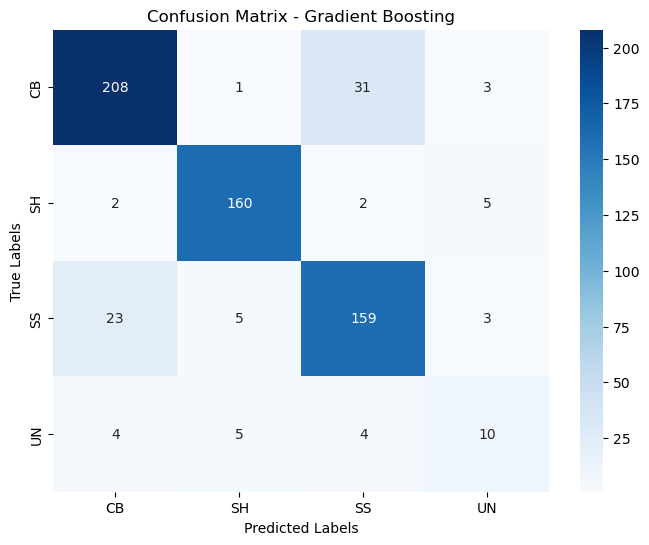



Classification Report- Gradient Boosting
              precision    recall  f1-score   support

          CB       0.88      0.86      0.87       243
          SH       0.94      0.95      0.94       169
          SS       0.81      0.84      0.82       190
          UN       0.48      0.43      0.45        23

    accuracy                           0.86       625
   macro avg       0.78      0.77      0.77       625
weighted avg       0.86      0.86      0.86       625



In [112]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

name=top_model_name
# Assuming 'best_model' is your single best performing model
# Make predictions on the test set
y_pred = top_model_evaluated.predict(X_test_i_s_no_high_corr_r_q)

# Get unique facies labels from the NumPy array
facies_labels = np.unique(y_test_le_i)
facies_labels=label_encoder.inverse_transform(facies_labels)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_le_i, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=facies_labels, yticklabels=facies_labels)
# plt.title('Confusion Matrix - {top_model_name}')
plt.title('Confusion Matrix - {}'.format(name))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print('\n')
# Print classification report
print('Classification Report- {}'.format(name))
print(classification_report(y_test_le_i, y_pred, target_names=[str(label) for label in facies_labels]))

### Confusion Matrix and Classification Report for the best model for all the techniques

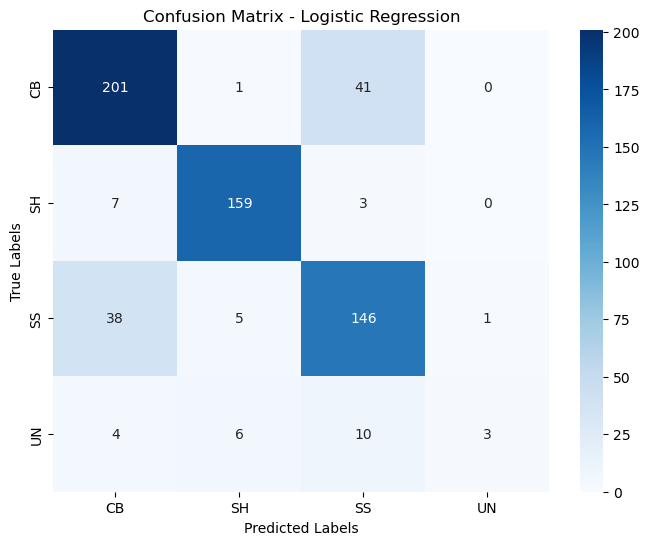



Classification Report - Logistic Regression
              precision    recall  f1-score   support

          CB       0.80      0.83      0.82       243
          SH       0.93      0.94      0.94       169
          SS       0.73      0.77      0.75       190
          UN       0.75      0.13      0.22        23

    accuracy                           0.81       625
   macro avg       0.80      0.67      0.68       625
weighted avg       0.81      0.81      0.81       625





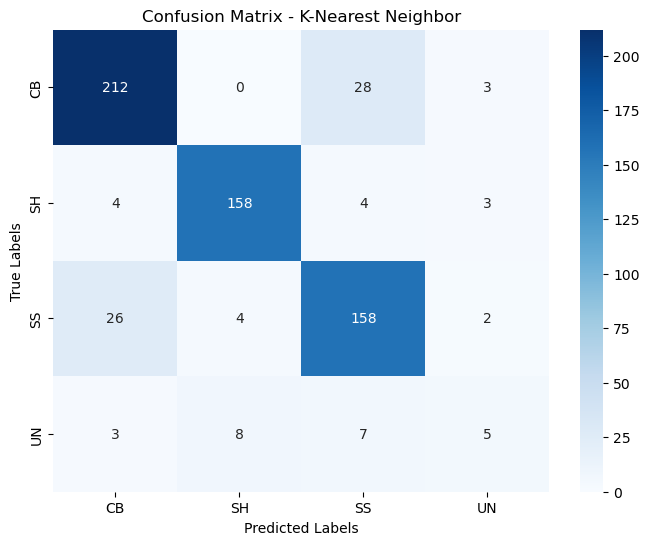



Classification Report - K-Nearest Neighbor
              precision    recall  f1-score   support

          CB       0.87      0.87      0.87       243
          SH       0.93      0.93      0.93       169
          SS       0.80      0.83      0.82       190
          UN       0.38      0.22      0.28        23

    accuracy                           0.85       625
   macro avg       0.75      0.71      0.72       625
weighted avg       0.85      0.85      0.85       625





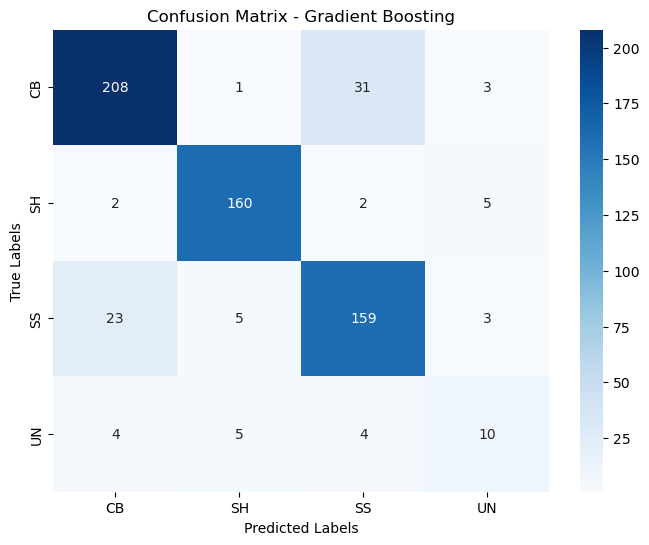



Classification Report - Gradient Boosting
              precision    recall  f1-score   support

          CB       0.88      0.86      0.87       243
          SH       0.94      0.95      0.94       169
          SS       0.81      0.84      0.82       190
          UN       0.48      0.43      0.45        23

    accuracy                           0.86       625
   macro avg       0.78      0.77      0.77       625
weighted avg       0.86      0.86      0.86       625





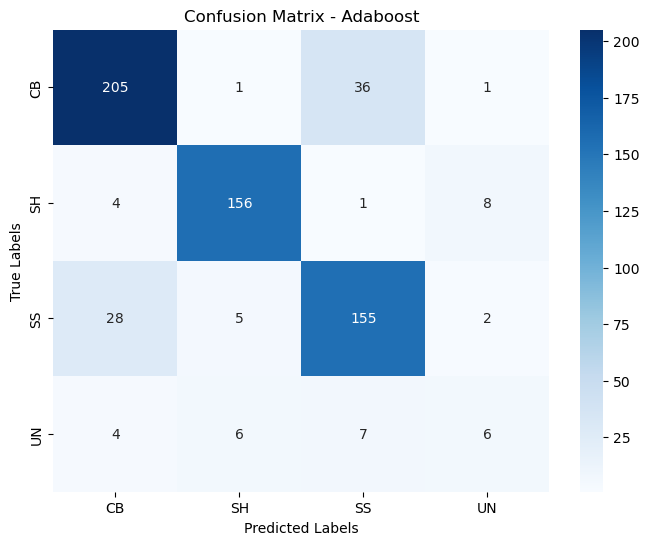



Classification Report - Adaboost
              precision    recall  f1-score   support

          CB       0.85      0.84      0.85       243
          SH       0.93      0.92      0.93       169
          SS       0.78      0.82      0.80       190
          UN       0.35      0.26      0.30        23

    accuracy                           0.84       625
   macro avg       0.73      0.71      0.72       625
weighted avg       0.83      0.84      0.83       625





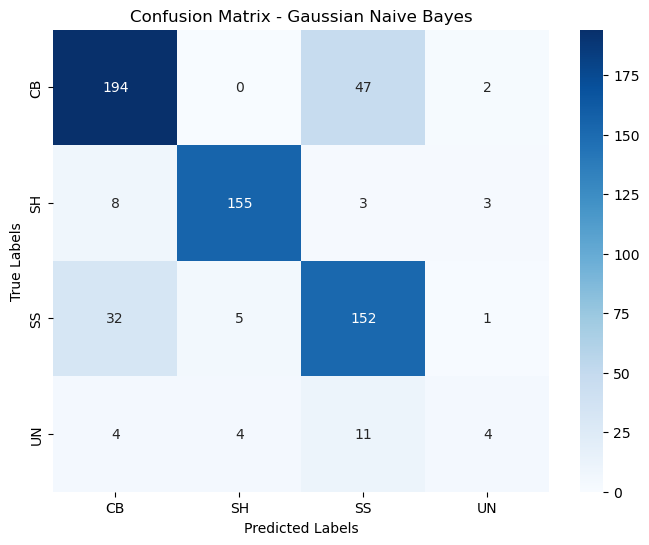



Classification Report - Gaussian Naive Bayes
              precision    recall  f1-score   support

          CB       0.82      0.80      0.81       243
          SH       0.95      0.92      0.93       169
          SS       0.71      0.80      0.75       190
          UN       0.40      0.17      0.24        23

    accuracy                           0.81       625
   macro avg       0.72      0.67      0.68       625
weighted avg       0.80      0.81      0.80       625





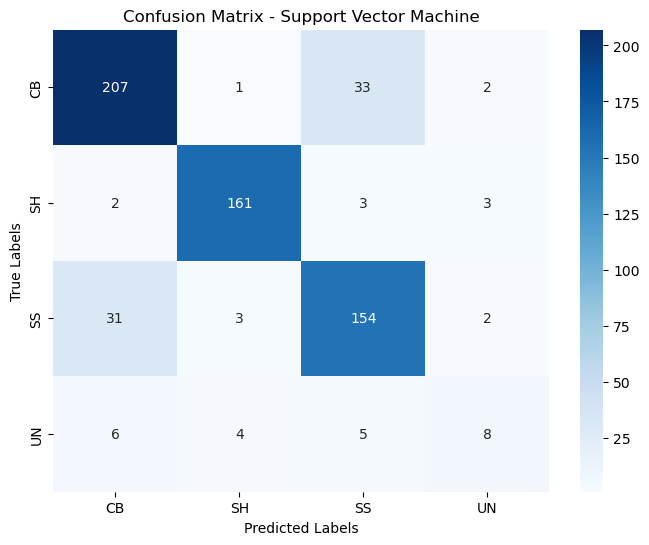



Classification Report - Support Vector Machine
              precision    recall  f1-score   support

          CB       0.84      0.85      0.85       243
          SH       0.95      0.95      0.95       169
          SS       0.79      0.81      0.80       190
          UN       0.53      0.35      0.42        23

    accuracy                           0.85       625
   macro avg       0.78      0.74      0.76       625
weighted avg       0.84      0.85      0.85       625





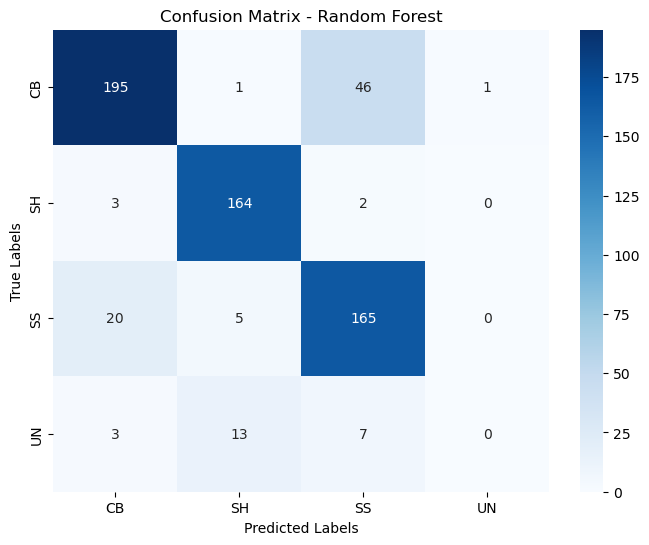



Classification Report - Random Forest
              precision    recall  f1-score   support

          CB       0.88      0.80      0.84       243
          SH       0.90      0.97      0.93       169
          SS       0.75      0.87      0.80       190
          UN       0.00      0.00      0.00        23

    accuracy                           0.84       625
   macro avg       0.63      0.66      0.64       625
weighted avg       0.81      0.84      0.82       625





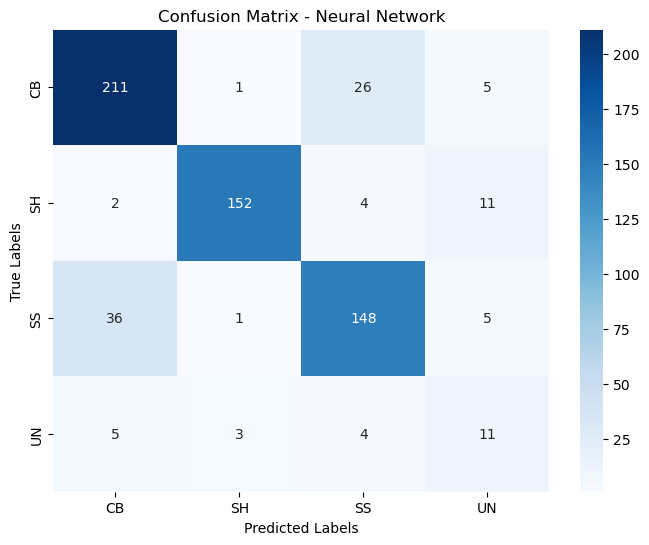



Classification Report - Neural Network
              precision    recall  f1-score   support

          CB       0.83      0.87      0.85       243
          SH       0.97      0.90      0.93       169
          SS       0.81      0.78      0.80       190
          UN       0.34      0.48      0.40        23

    accuracy                           0.84       625
   macro avg       0.74      0.76      0.74       625
weighted avg       0.84      0.84      0.84       625





In [113]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test_i_s_no_high_corr_r_q, y_test_le_i are your test data and labels
for name, model in best_models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test_i_s_no_high_corr_r_q)

    # Get unique facies labels from the NumPy array
    facies_labels = np.unique(y_test_le_i)
    facies_labels=label_encoder.inverse_transform(facies_labels)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test_le_i, y_pred)

    # Display the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=facies_labels, yticklabels=facies_labels)
    plt.title('Confusion Matrix - {}'.format(name))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    print('\n')

    # Print classification report
    print('Classification Report - {}'.format(name))
    print(classification_report(y_test_le_i, y_pred, target_names=[str(label) for label in facies_labels]))
    print('\n')

### Which facies is easy to predict? Which facies is hard to predict? (single best performing model)

In [114]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = top_model_evaluated.predict(X_test_i_s_no_high_corr_r_q)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_le_i, y_pred)

# Calculate true positives, false positives, and false negatives for each facies
true_positives = np.diag(conf_matrix)
false_positives = np.sum(conf_matrix, axis=0) - true_positives
false_negatives = np.sum(conf_matrix, axis=1) - true_positives

# Calculate precision, recall, and F1-score for each facies
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results for each facies
for i, facies_label in enumerate(facies_labels):
    print(f"Facies {facies_label}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1 Score: {f1_score[i]:.4f}")
    print("="*30)

Facies CB:
  Precision: 0.8776
  Recall: 0.8560
  F1 Score: 0.8667
Facies SH:
  Precision: 0.9357
  Recall: 0.9467
  F1 Score: 0.9412
Facies SS:
  Precision: 0.8112
  Recall: 0.8368
  F1 Score: 0.8238
Facies UN:
  Precision: 0.4762
  Recall: 0.4348
  F1 Score: 0.4545


## Analysis:

#### Easy to Predict: 
##### Facies SH (Label encoded as 1) seems to be the easiest to predict, as it has high precision, recall, and F1 score. This indicates that the model performs well in correctly identifying instances of Facies SH (Label encoded as 1).
#### Hard to Predict: 
##### Facies UN (Label encoded as 3) appears to be the hardest to predict, as it has the lowest precision, recall, and F1 score among the four facies. The model struggles to correctly identify instances of Facies UN (Label encoded as 3), leading to a lower overall performance for this facies.

### Saving  top 3 model  using pickle

In [115]:
for index, model_name in enumerate(top_3_model_names, start=1):
    model = best_models[model_name]
    with open(f'model{index}_top_model.pkl', 'wb') as file:
        pickle.dump(model, file)

In [116]:
X_train_i_s_no_high_corr_r_q_df=pd.DataFrame(X_train_i_s_no_high_corr_r_q,columns=X_train_i_s_no_high_corr_r.columns)

### New concept - Permutation Importance

#### Permutation Importance is a technique used to evaluate the importance of each feature in a machine learning model. The basic idea is to measure the impact of randomly shuffling the values of a specific feature on the model's performance.

### How it Matters:

- Identifying Important Features: Permutation Importance helps you understand which features have the most significant impact on your model's performance. This information is valuable for feature selection and understanding the underlying factors contributing to predictions.
- Model Interpretability: Knowing the importance of features enhances the interpretability of your model. Stakeholders and domain experts can gain insights into which variables are crucial for the model's decision-making process.
- Feature Engineering: If certain features are found to have low permutation importance, it might suggest that these features are less relevant or redundant. This insight can guide feature engineering efforts, potentially improving model efficiency.
- Model Trustworthiness: Understanding feature importance contributes to the overall trustworthiness of your model. It allows you to communicate to stakeholders and end-users which factors the model relies on most heavily.

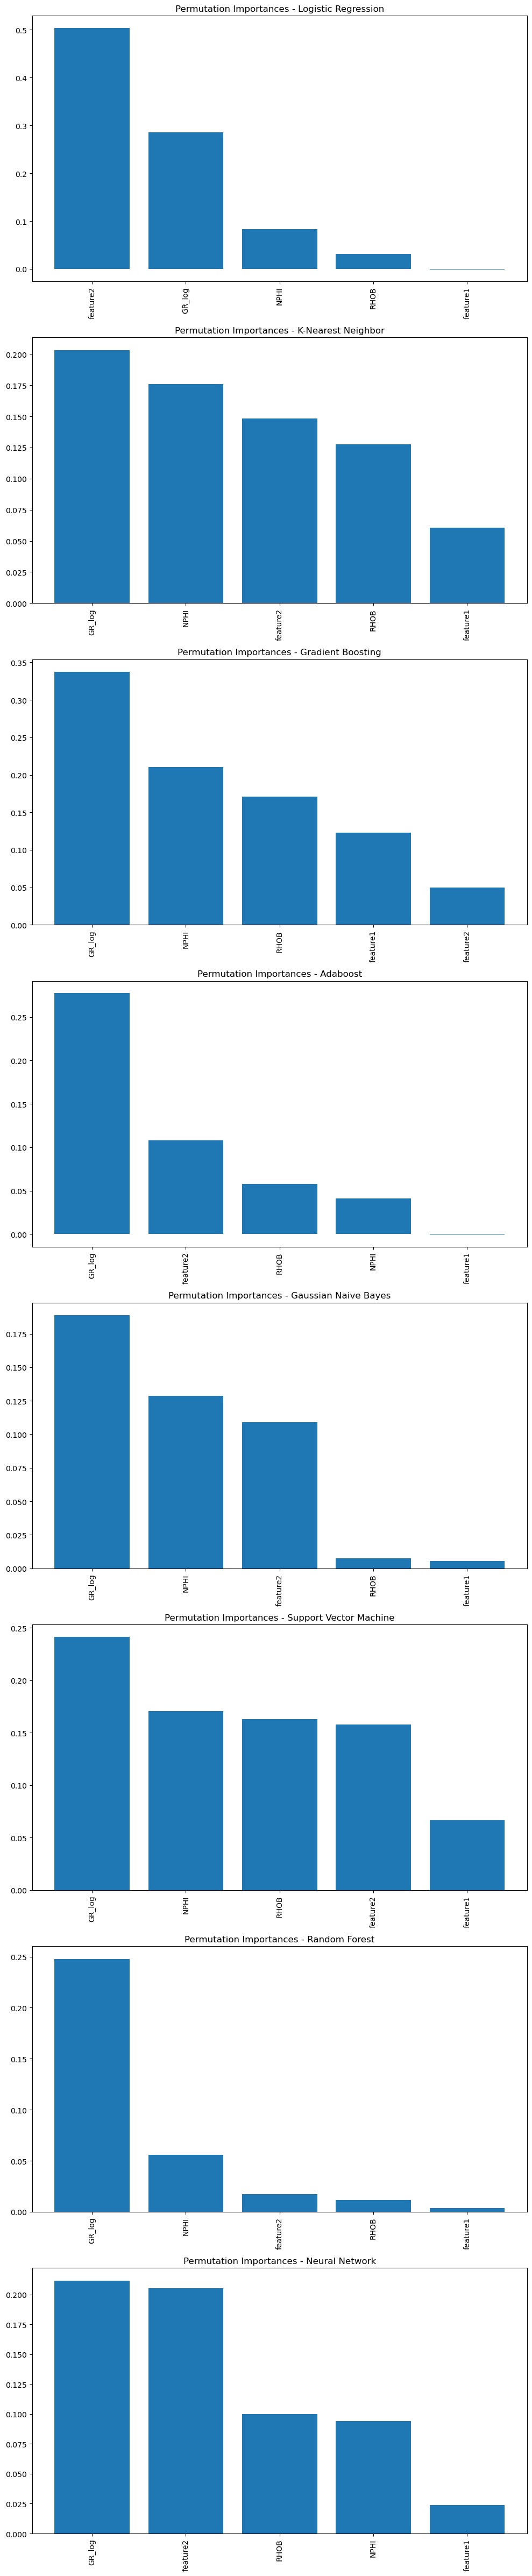

In [117]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
# Loop through each model and plot permutation importances
fig, axs = plt.subplots(nrows=len(best_models), figsize=(10, 6 * len(best_models)))

for i, (model_name, model) in enumerate(best_models.items()):
    # Train the model
    model.fit(X_train_i_s_no_high_corr_r_q_df, y_train_le_i)

    # Calculate permutation importances
    perm_importance = permutation_importance(model, X_train_i_s_no_high_corr_r_q_df, y_train_le_i,
                                             n_repeats=30, random_state=42)

    # Get feature names
    feature_names = X_train_i_s_no_high_corr_r_q_df.columns

    # Sort features by importance
    sorted_indices = perm_importance.importances_mean.argsort()[::-1]

    # Plot permutation importances for each model
    axs[i].bar(range(len(perm_importance.importances_mean)), perm_importance.importances_mean[sorted_indices])
    axs[i].set_xticks(range(len(perm_importance.importances_mean)))
    axs[i].set_xticklabels(feature_names[sorted_indices], rotation=90)
    axs[i].set_title(f'Permutation Importances - {model_name}')

plt.tight_layout()
plt.show()